# **Setup // Initial**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("MINI ITC 2025.xlsx")
df.head()

,system_name,region,attack_type,data_sensitivity_level,records_exposed,estimated_cost_per_record_usd,estimated_total_cost_usd,detection_delay_days,response_time_days,notification_required
0,CRM,latam-south2,External Hacker,4,56681,17.91,1014973.29,18,7,Yes
1,CRM,ca-central1,Misconfiguration,4,97901,18.07,1769502.68,10,9,Yes
2,Support,africa-south1,Misconfiguration,3,16274,13.34,217074.77,3,3,Yes
3,Billing,asia-south1,Insider,5,41640,21.44,892759.36,9,4,Yes
4,HR,eu-north1,Misconfiguration,5,45484,21.09,959464.03,7,7,Yes


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   system_name                    100 non-null    object 
 1   region                         100 non-null    object 
 2   attack_type                    100 non-null    object 
 3   data_sensitivity_level         100 non-null    int64  
 4   records_exposed                100 non-null    int64  
 5   estimated_cost_per_record_usd  100 non-null    float64
 6   estimated_total_cost_usd       100 non-null    float64
 7   detection_delay_days           100 non-null    int64  
 8   response_time_days             100 non-null    int64  
 9   notification_required          100 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.9+ KB


In [25]:
unique_system_names = df['system_name'].unique()
unique_regions = df['region'].unique()
unique_attack_types = df['attack_type'].unique()

print("Unique System Names:")
for name in unique_system_names:
    print(f"- {name}")

print("\nUnique Regions:")
for region in unique_regions:
    print(f"- {region}")

print("\nUnique Attack Types:")
for attack_type in unique_attack_types:
    print(f"- {attack_type}")

Unique System Names:
- CRM
- Support
- Billing
- HR
- Analytics

Unique Regions:
- latam-south2
- ca-central1
- africa-south1
- asia-south1
- eu-north1
- ap-south1
- latam-north1
- ap-northeast2
- us-east2
- me-central1
- us-east1
- us-central2
- eu-west1
- us-west2
- ap-southeast1
- us-east3
- asia-east1
- ap-northeast1
- us-west1
- eu-west2
- eu-central2
- ap-south2
- latam-south1
- ap-southeast2
- us-central1
- eu-central1

Unique Attack Types:
- External Hacker
- Misconfiguration
- Insider


# **Detection and Response Time**

In [27]:
average_detection_delay = df['detection_delay_days'].mean()
average_response_time = df['response_time_days'].mean()

print(f"Average detection delay days: {average_detection_delay:.2f}")
print(f"Average response time days: {average_response_time:.2f}")

Average detection delay days: 11.67
Average response time days: 7.25


## **By System**

In [29]:
average_times_by_system = df.groupby('system_name')[['detection_delay_days', 'response_time_days']].mean().reset_index()
print("Average Detection Delay and Response Time by System Name:")
display(average_times_by_system)

Average Detection Delay and Response Time by System Name:


,system_name,detection_delay_days,response_time_days
0,Analytics,9.700000,6.700000
1,Billing,12.409091,7.681818
2,CRM,13.052632,7.315789
3,HR,13.111111,7.666667
4,Support,10.285714,6.904762


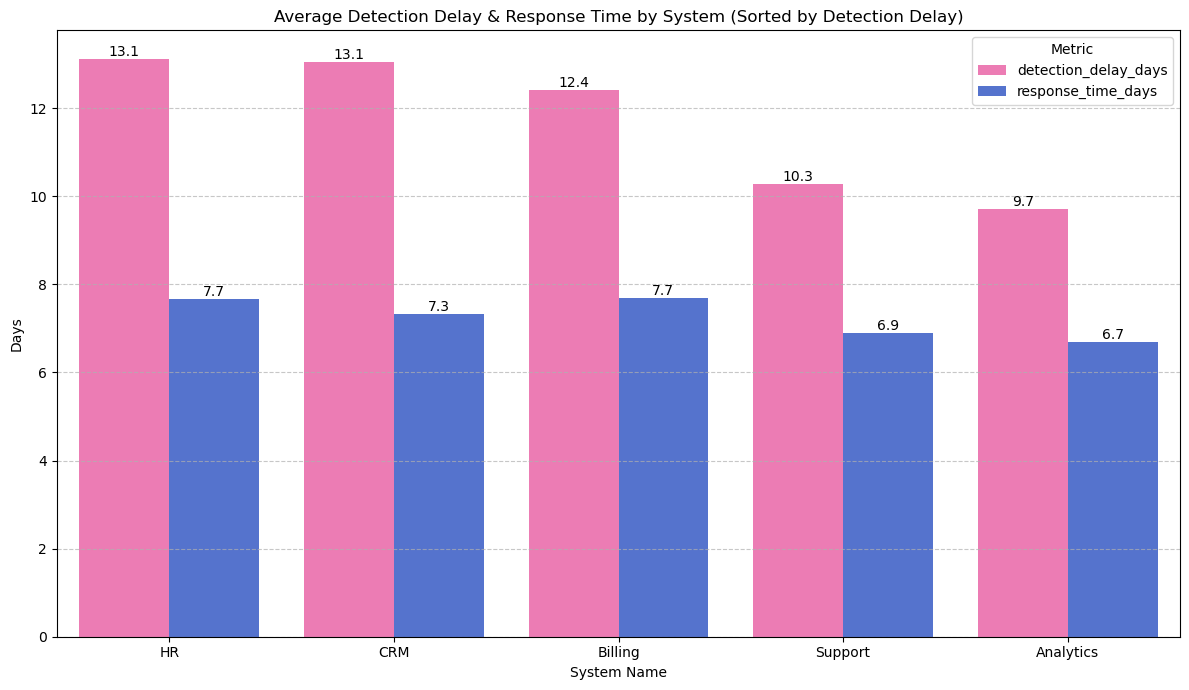

In [30]:
melted_average_times = average_times_by_system.melt(
    id_vars=['system_name'],
    value_vars=['detection_delay_days', 'response_time_days'],
    var_name='Metric',
    value_name='Days'
)

sorted_systems = average_times_by_system.sort_values(by='detection_delay_days', ascending=False)['system_name'].tolist()

colors = {'detection_delay_days': 'hotpink', 'response_time_days': 'royalblue'}

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=melted_average_times,
    x='system_name',
    y='Days',
    hue='Metric',
    palette=colors,
    order=sorted_systems
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.title('Average Detection Delay & Response Time by System (Sorted by Detection Delay)')
plt.xlabel('System Name')
plt.ylabel('Days')
plt.legend(title='Metric')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **By Region**

classify Regions


In [33]:
region_category_mapping = {
    'ca-central1': 'Canada',
    'us-east2': 'USA',
    'us-east1': 'USA',
    'us-central2': 'USA',
    'us-west2': 'USA',
    'us-east3': 'USA',
    'us-west1': 'USA',
    'us-central1': 'USA',
    'latam-south2': 'South America',
    'latam-north1': 'South America',
    'latam-south1': 'South America',
    'eu-north1': 'Europe',
    'eu-west1': 'Europe',
    'eu-west2': 'Europe',
    'eu-central2': 'Europe',
    'eu-central1': 'Europe',
    'africa-south1': 'Africa',
    'asia-south1': 'Asia',
    'ap-south1': 'Asia',
    'asia-east1': 'Asia',
    'ap-south2': 'Asia',
    'ap-northeast2': 'Asia Pacific',
    'ap-southeast1': 'Asia Pacific',
    'ap-northeast1': 'Asia Pacific',
    'ap-southeast2': 'Asia Pacific',
    'me-central1': 'Middle East'
}

df['region_category'] = df['region'].map(region_category_mapping)
df.head()

,system_name,region,attack_type,data_sensitivity_level,records_exposed,estimated_cost_per_record_usd,estimated_total_cost_usd,detection_delay_days,response_time_days,notification_required,region_category
0,CRM,latam-south2,External Hacker,4,56681,17.91,1014973.29,18,7,Yes,South America
1,CRM,ca-central1,Misconfiguration,4,97901,18.07,1769502.68,10,9,Yes,Canada
2,Support,africa-south1,Misconfiguration,3,16274,13.34,217074.77,3,3,Yes,Africa
3,Billing,asia-south1,Insider,5,41640,21.44,892759.36,9,4,Yes,Asia
4,HR,eu-north1,Misconfiguration,5,45484,21.09,959464.03,7,7,Yes,Europe


In [34]:
average_times_by_region = df.groupby('region_category')[['detection_delay_days', 'response_time_days']].mean().reset_index()
print("Average Detection Delay and Response Time by Region Category:")
display(average_times_by_region)

Average Detection Delay and Response Time by Region Category:


,region_category,detection_delay_days,response_time_days
0,Africa,7.666667,5.333333
1,Asia,10.562500,6.875000
2,Asia Pacific,12.529412,7.000000
3,Canada,11.400000,8.200000
4,Europe,12.722222,7.444444
5,Middle East,11.500000,4.500000
6,South America,12.083333,7.833333
7,USA,11.400000,7.720000


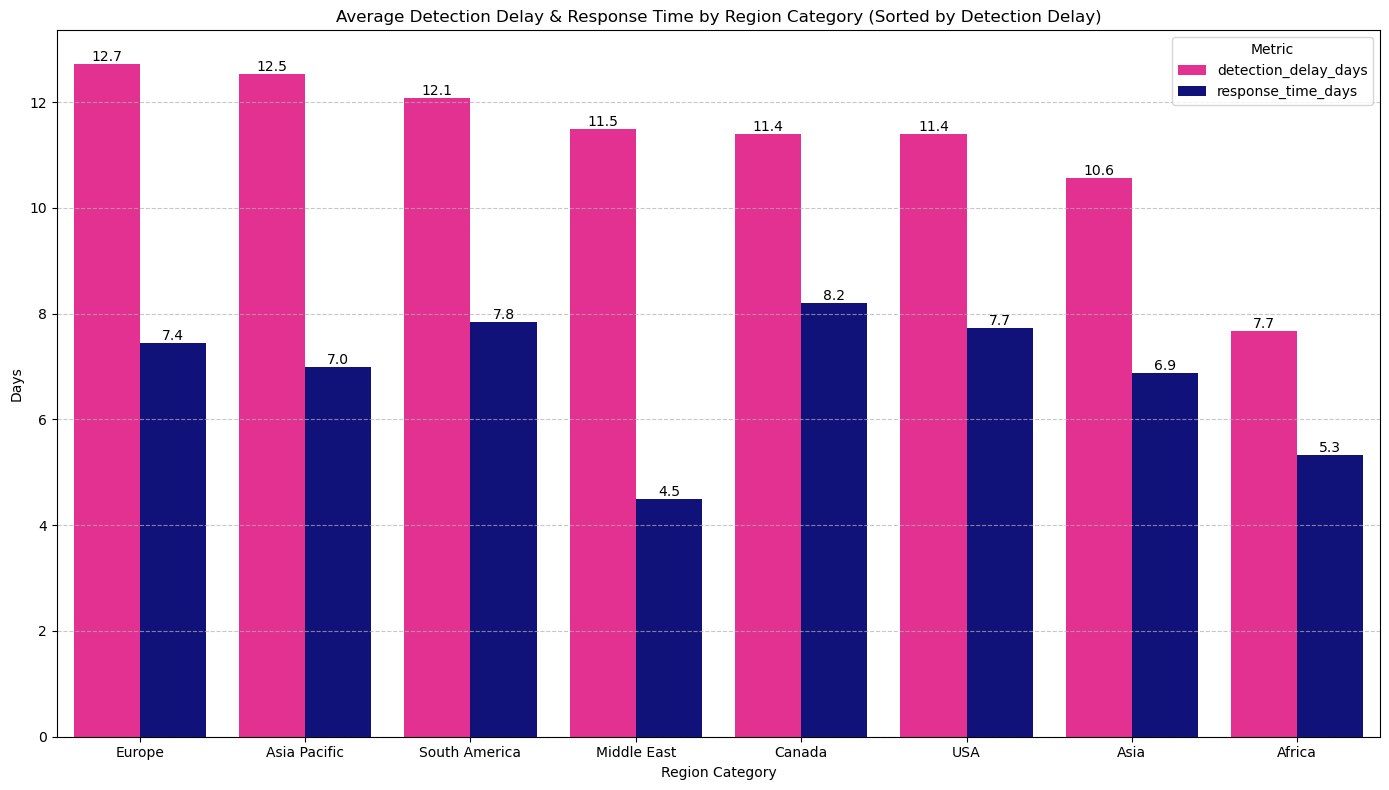

In [35]:
melted_average_times_region = average_times_by_region.melt(
    id_vars=['region_category'],
    value_vars=['detection_delay_days', 'response_time_days'],
    var_name='Metric',
    value_name='Days'
)

sorted_regions = average_times_by_region.sort_values(by='detection_delay_days', ascending=False)['region_category'].tolist()

colors_regional = {'detection_delay_days': 'deeppink', 'response_time_days': 'darkblue'}

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=melted_average_times_region,
    x='region_category',
    y='Days',
    hue='Metric',
    palette=colors_regional,
    order=sorted_regions
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.title('Average Detection Delay & Response Time by Region Category (Sorted by Detection Delay)')
plt.xlabel('Region Category')
plt.ylabel('Days')
plt.legend(title='Metric')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*   **Detection Delay:** Europe and Asia Pacific regions generally have the highest average detection delays. Africa shows the lowest average detection delay.
*   **Response Time:** The Middle East has the lowest average response time, which is significant compared to other regions. Canada & USA have slightly higher response times compared to the average, while Africa's response time is also relatively low.
*   **Comparison:** Across all regions, detection delay is much longer than  response time, indicating that identifying a breach is more time-consuming than responding once detected.
*   **Potential Areas for Improvement:** Places with higher detection delays could focus on improving threat detection techniques. Use the Middle East's response speed as a model for other regions.

## **By Attack Type**

In [38]:
average_times_by_attack_type = df.groupby('attack_type')[['detection_delay_days', 'response_time_days']].mean().reset_index()
print("Average Detection Delay and Response Time by Attack Type:")
display(average_times_by_attack_type)

Average Detection Delay and Response Time by Attack Type:


,attack_type,detection_delay_days,response_time_days
0,External Hacker,11.562500,7.562500
1,Insider,13.125000,6.062500
2,Misconfiguration,11.352941,7.455882


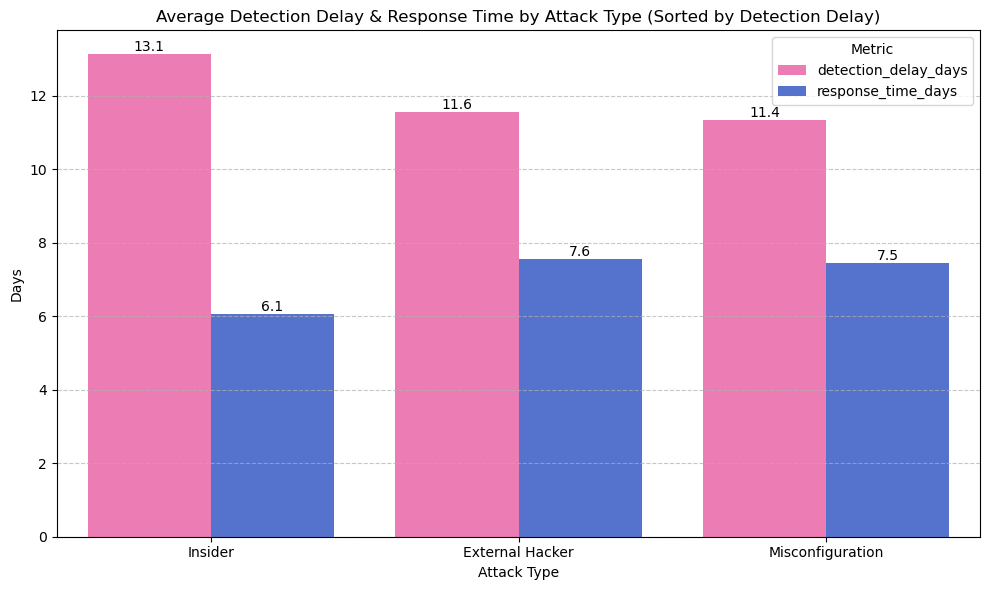

In [39]:
melted_average_times_attack = average_times_by_attack_type.melt(
    id_vars=['attack_type'],
    value_vars=['detection_delay_days', 'response_time_days'],
    var_name='Metric',
    value_name='Days'
)

sorted_attack_types = average_times_by_attack_type.sort_values(by='detection_delay_days', ascending=False)['attack_type'].tolist()

colors = {'detection_delay_days': 'hotpink', 'response_time_days': 'royalblue'}

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=melted_average_times_attack,
    x='attack_type',
    y='Days',
    hue='Metric',
    palette=colors,
    order=sorted_attack_types
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.title('Average Detection Delay & Response Time by Attack Type (Sorted by Detection Delay)')
plt.xlabel('Attack Type')
plt.ylabel('Days')
plt.legend(title='Metric')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* **Insider threats** are some of the hardest to detect. While response time is quick once detected, the long period of time allows for a lot of damage to be dealt. Companies should invest focus on internal monitoring. (ZERO TRUST ARCHITECTURE recommendation)
* **External hacks** have moderate detection speed and a slightly longer reponse delay. A focus on attack detection systems and good network defences.
* **Misconfigurations** has the quickest detection delay meaning these issues are quick to spot. However, the response time is almost similar to that of external attacks highlighting how it is important to have things like vulnerability scanning and posture assessments to prevent these gaps in the system from being exploited.

# **Additional**

## **Average Data Sensitivity**

### **By System**

In [44]:
average_sensitivity_by_system = df.groupby('system_name')['data_sensitivity_level'].mean().reset_index()
average_sensitivity_by_system = average_sensitivity_by_system.sort_values(by='data_sensitivity_level', ascending=False)

print("Average Data Sensitivity Level by System Name (Descending Order):")
display(average_sensitivity_by_system)

Average Data Sensitivity Level by System Name (Descending Order):


,system_name,data_sensitivity_level
3,HR,4.777778
1,Billing,4.636364
2,CRM,3.631579
4,Support,3.142857
0,Analytics,1.950000


The top 3 systems which are the most sensitive are HR, Billing & CRM, and yet these are the systems that take the longest in terms of attack detection and have the delay in response.

### **BY Region category**

In [47]:
average_sensitivity_by_region_category = df.groupby('region_category')['data_sensitivity_level'].mean().reset_index()
average_sensitivity_by_region_category = average_sensitivity_by_region_category.sort_values(by='data_sensitivity_level', ascending=False)

print("Average Data Sensitivity Level by Region Category (Descending Order):")
display(average_sensitivity_by_region_category)

Average Data Sensitivity Level by Region Category (Descending Order):


,region_category,data_sensitivity_level
6,South America,4.083333
4,Europe,3.833333
3,Canada,3.800000
1,Asia,3.562500
2,Asia Pacific,3.529412
7,USA,3.440000
5,Middle East,3.250000
0,Africa,3.000000


### **By attack type**

In [49]:
average_sensitivity_by_attack_type = df.groupby('attack_type')['data_sensitivity_level'].mean().reset_index()
average_sensitivity_by_attack_type = average_sensitivity_by_attack_type.sort_values(by='data_sensitivity_level', ascending=False)

print("Average Data Sensitivity Level by Attack Type (Descending Order):")
display(average_sensitivity_by_attack_type)

Average Data Sensitivity Level by Attack Type (Descending Order):


,attack_type,data_sensitivity_level
2,Misconfiguration,3.676471
0,External Hacker,3.562500
1,Insider,3.437500


## **Correlations**

Correlation of records exposed to detection delay days

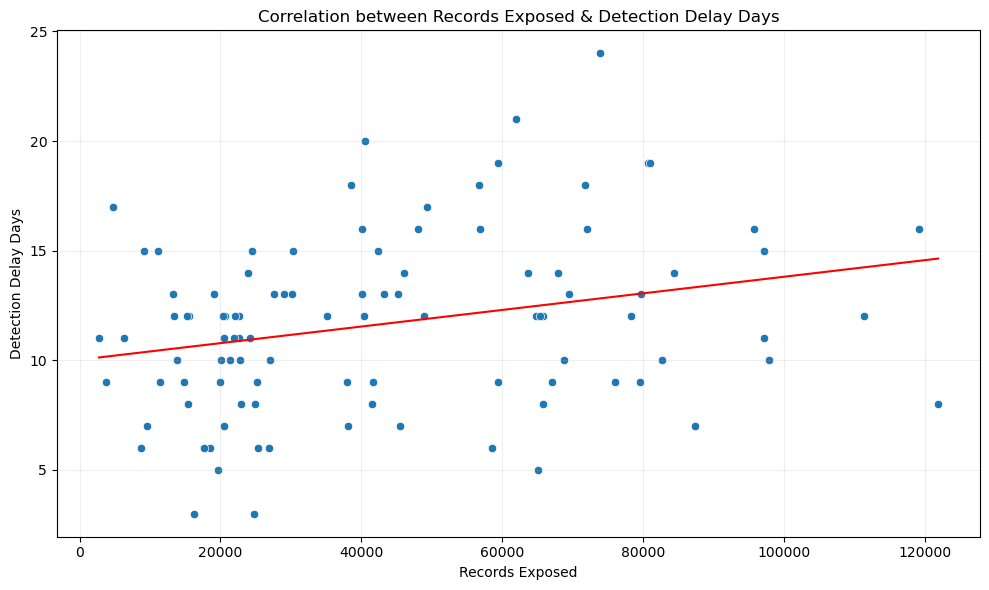

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='records_exposed', y='detection_delay_days')

#LoBF
x = df['records_exposed']
y = df['detection_delay_days']
slope, intercept = np.polyfit(x, y, 1)

x_line = np.array([x.min(), x.max()])
y_line = slope * x_line + intercept

plt.plot(x_line, y_line, color='red')

plt.title('Correlation between Records Exposed & Detection Delay Days')
plt.xlabel('Records Exposed')
plt.ylabel('Detection Delay Days')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [53]:
correlation = df['records_exposed'].corr(df['detection_delay_days'])
print(f"Correlation between Records Exposed and Detection Delay Days: {correlation:.2f}")

Correlation between Records Exposed and Detection Delay Days: 0.27


Very low correlation between the how many records were exposed and how long it took to detect the attack.

Correlation Matrix of Numerical Stuff

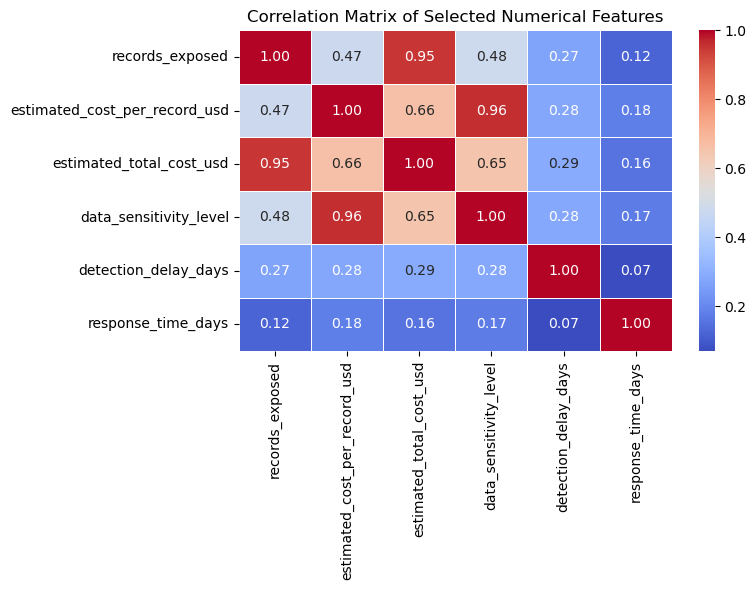

In [56]:
numerical_cols = [
    'records_exposed',
    'estimated_cost_per_record_usd',
    'estimated_total_cost_usd',
    'data_sensitivity_level',
    'detection_delay_days',
    'response_time_days'
]

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5
)
plt.title('Correlation Matrix of Selected Numerical Features')
plt.tight_layout()
plt.show()

Correlation of record_exposed and detection_delay_day BY attack type

In [58]:
correlation_by_attack_type = df.groupby('attack_type').apply(lambda x: x['records_exposed'].corr(x['detection_delay_days'])).reset_index(name='correlation')
print("Correlation between Records Exposed and Detection Delay Days by Attack Type:")
display(correlation_by_attack_type)

Correlation between Records Exposed and Detection Delay Days by Attack Type:


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\2867008862.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_attack_type = df.groupby('attack_type').apply(lambda x: x['records_exposed'].corr(x['detection_delay_days'])).reset_index(name='correlation')


,attack_type,correlation
0,External Hacker,0.402589
1,Insider,0.642477
2,Misconfiguration,0.234301


Correlation of record_exposed & detection_delay_day BY Region categories

In [60]:
correlation_by_region_category = df.groupby('region_category').apply(lambda x: x['records_exposed'].corr(x['detection_delay_days'])).reset_index(name='correlation')
print("Correlation between Records Exposed and Detection Delay Days by Region Category:")
display(correlation_by_region_category)

Correlation between Records Exposed and Detection Delay Days by Region Category:


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\798052811.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_region_category = df.groupby('region_category').apply(lambda x: x['records_exposed'].corr(x['detection_delay_days'])).reset_index(name='correlation')


,region_category,correlation
0,Africa,0.385477
1,Asia,0.460131
2,Asia Pacific,-0.058088
3,Canada,0.122224
4,Europe,0.445491
5,Middle East,0.964501
6,South America,-0.274651
7,USA,0.483133


**Summary**
* **Insider attacks** have a moderate strong correlation meaning the more time it took to detect, the more records were exposed. This makes sense and just really highlights how  it is **important to detect these internal attacks as soon as possible**.

* **Middle East** have an extremely high strong correlation suggesting that the larger the data breach is, the longer the delay to detect it is. This could point at the problem of widespread breaches going undetected for a long time. This could also mean that the detection system in the middle east are scoped too small and **aren't as prepared for large-scale attacks**. Use South America as model (corr: -0.27) where large breaches gain more direct attention and triggers quicker detection.

## **Average Record Exposed & Cost BY Attack Type**

In [63]:
average_records_exposed_by_attack_type = df.groupby('attack_type')['records_exposed'].mean().reset_index()
average_records_exposed_by_attack_type = average_records_exposed_by_attack_type.sort_values(by='records_exposed', ascending=False)

print("Average Records Exposed by Attack Type (Descending Order):")
display(average_records_exposed_by_attack_type)

Average Records Exposed by Attack Type (Descending Order):


,attack_type,records_exposed
2,Misconfiguration,45824.514706
0,External Hacker,41930.812500
1,Insider,35180.812500


In [64]:
average_estimated_total_cost_by_attack_type = df.groupby('attack_type')['estimated_total_cost_usd'].mean().reset_index()
average_estimated_total_cost_by_attack_type = average_estimated_total_cost_by_attack_type.sort_values(by='estimated_total_cost_usd', ascending=False)

print("Average Estimated Total Cost by Attack Type (Descending Order):")
display(average_estimated_total_cost_by_attack_type)

Average Estimated Total Cost by Attack Type (Descending Order):


,attack_type,estimated_total_cost_usd
2,Misconfiguration,777319.875000
0,External Hacker,723930.538125
1,Insider,573452.640000


# **Summary**

1. By Systems
* **HR, Billing, CRM** have the most sensitive data and yet they are areas with the highest detection delay and response time. This is a very critical risk as the impact of a data breach will be significant.
2. By Region
* **South America** is one the regions that have the most sensitive data AND they are also the best at mitigating large data breachs (correlation of records exposed and detection delay).
* **Middle East** has the lowest average sensitive data, but that doesn't mean the data isn't important. The Middle East has the worst correlation of records exposed and detection delay indicating that when there is a large-scale data breach, it goes undetected for a longer period of time.
3. By Attack Type
* **Misconfigurations** are some of the quickest to detect, but they are also typically associated to highly sensitive data. Again, highlighting the importance of posture assessment and security audits.

---
**FOCUS**
* protect high-sensitive systems like HR, Billing, CRM. Align MissaTech's security investment with data sensitivity. Failure to have strong security in these areas create a critical gap for damage to be done.

* Regions such as USA, South America, Europe need to continue to maintain a standard of strict data protection due to their high average data sensitivity. For the Middle East, with a high correlation between large data breaches and long detection delays, need to re-evaluate their security model and significantly improve detection capabilities, particularly for large-scale breaches.

* Because misconfigurations typically result in breaches of highly sensitive data, implement things such as security checks, regular audits, and standardized data handling practices to greatly reduce the risk.

* Insider attack typically takes longer to detect and they are also correlated to larger-scale data breaches with the more time it takes it detect them, a focus on internal security is important with implementation of things such as behavior analysis and least-privilege access. There is a need due to its nature of slow detection.

# Additional visuals - Ben

In [134]:
df.head()

,system_name,region,attack_type,data_sensitivity_level,records_exposed,estimated_cost_per_record_usd,estimated_total_cost_usd,detection_delay_days,response_time_days,notification_required,region_category
0,CRM,latam-south2,External Hacker,4,56681,17.91,1014973.29,18,7,Yes,South America
1,CRM,ca-central1,Misconfiguration,4,97901,18.07,1769502.68,10,9,Yes,Canada
2,Support,africa-south1,Misconfiguration,3,16274,13.34,217074.77,3,3,Yes,Africa
3,Billing,asia-south1,Insider,5,41640,21.44,892759.36,9,4,Yes,Asia
4,HR,eu-north1,Misconfiguration,5,45484,21.09,959464.03,7,7,Yes,Europe


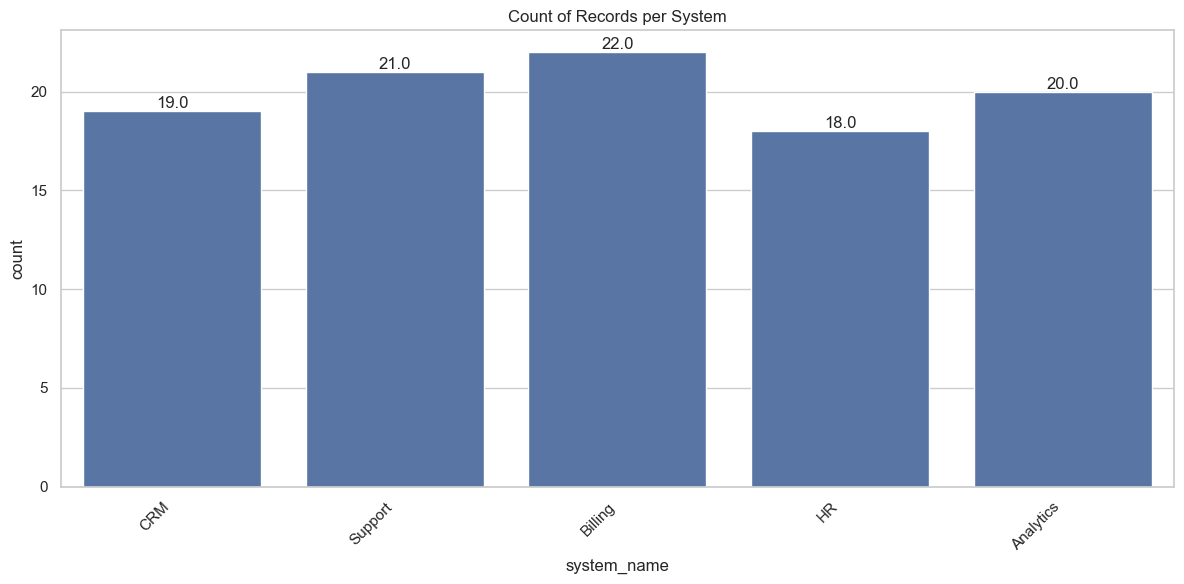

In [131]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="system_name")
plt.xticks(rotation=45, ha='right')
plt.title("Count of Records per System")

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


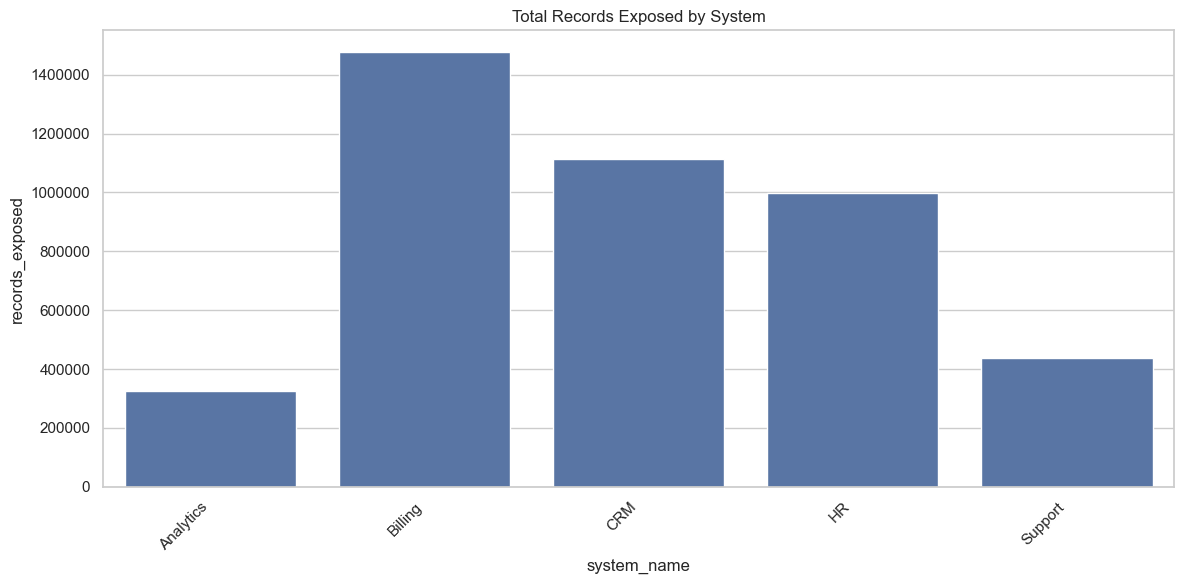

In [119]:
sns.set_style('whitegrid')

grp_total_records = df.groupby("system_name")["records_exposed"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=grp_total_records,
    x="system_name",
    y="records_exposed"
)
plt.xticks(rotation=45, ha='right')
plt.title("Total Records Exposed by System")

from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


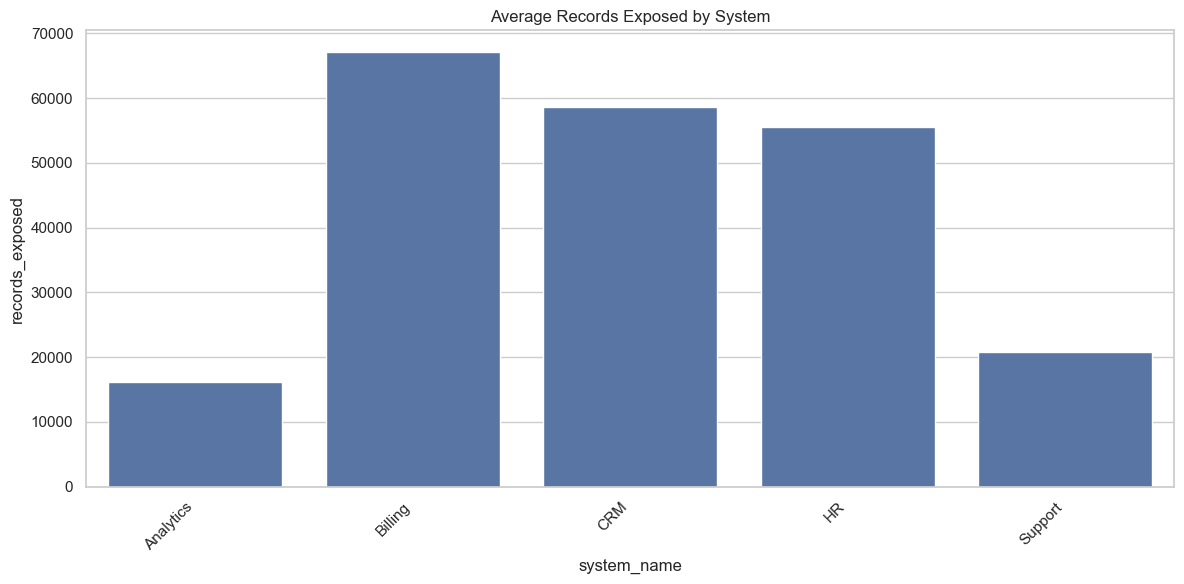

In [121]:
sns.set_style('whitegrid')

grp_avg_records = df.groupby("system_name")["records_exposed"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=grp_avg_records,
    x="system_name",
    y="records_exposed"
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Records Exposed by System")

from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


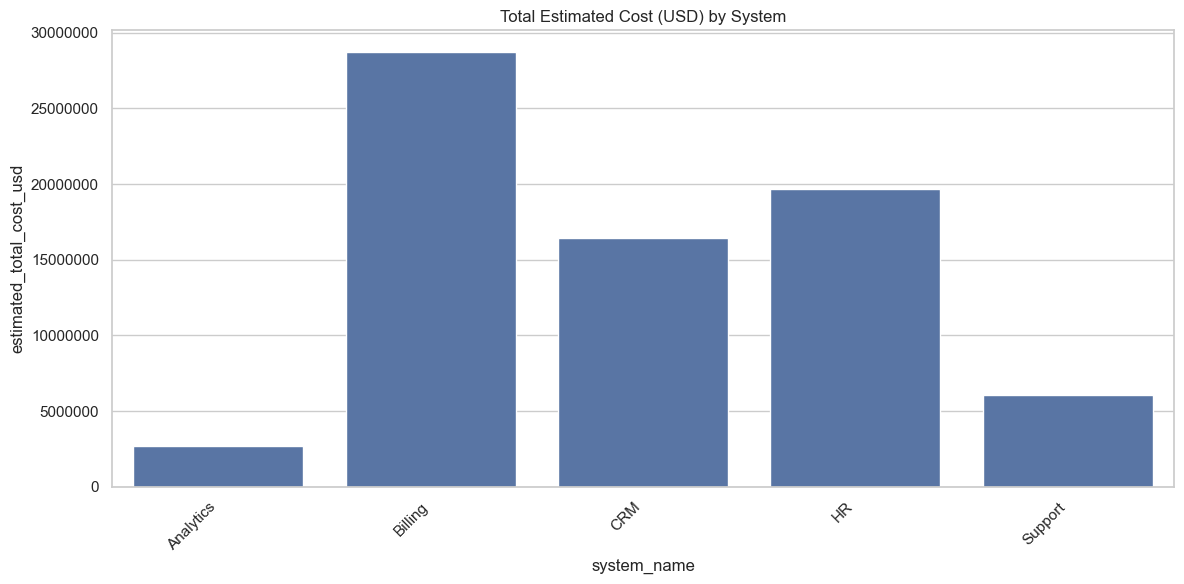

In [123]:
sns.set_style('whitegrid')

grp_total_cost = df.groupby("system_name")["estimated_total_cost_usd"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=grp_total_cost,
    x="system_name",
    y="estimated_total_cost_usd"
)
plt.xticks(rotation=45, ha='right')
plt.title("Total Estimated Cost (USD) by System")

from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


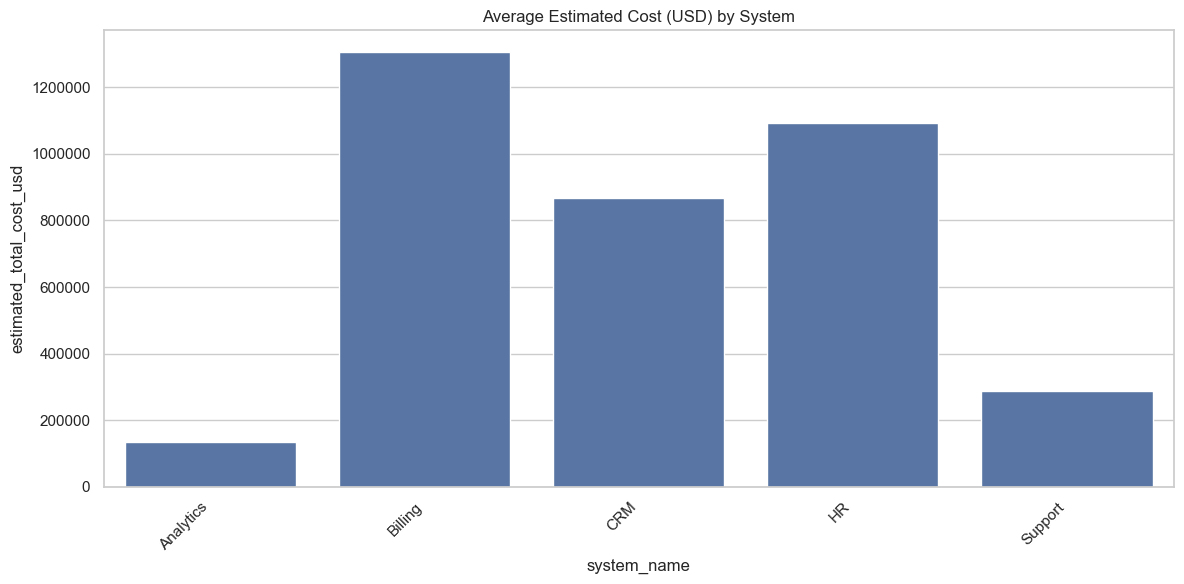

In [125]:
sns.set_style('whitegrid')

grp_avg_cost = df.groupby("system_name")["estimated_total_cost_usd"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(
    data=grp_avg_cost,
    x="system_name",
    y="estimated_total_cost_usd"
)
plt.xticks(rotation=45, ha='right')
plt.title("Average Estimated Cost (USD) by System")

from matplotlib.ticker import ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


The distribution of total and average look similar due to relativly even distribution of the 5 systems

Total cost heavily correlated to records lost, but CRM and HR are swithced for second and third when going from records leaked to cost

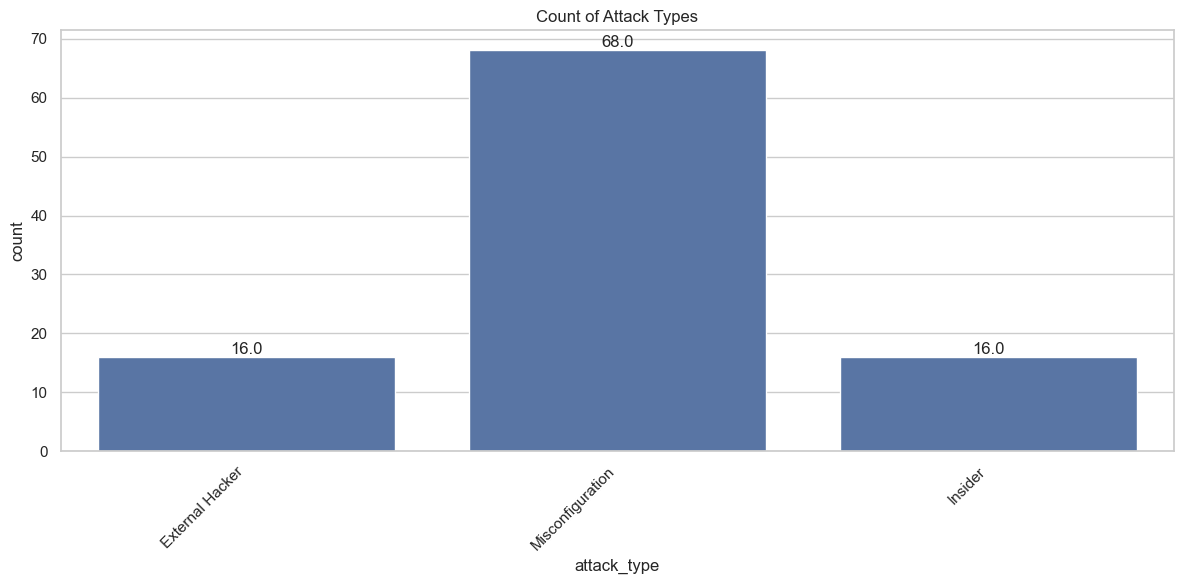

In [136]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x="attack_type")
plt.xticks(rotation=45, ha='right')
plt.title("Count of Attack Types")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


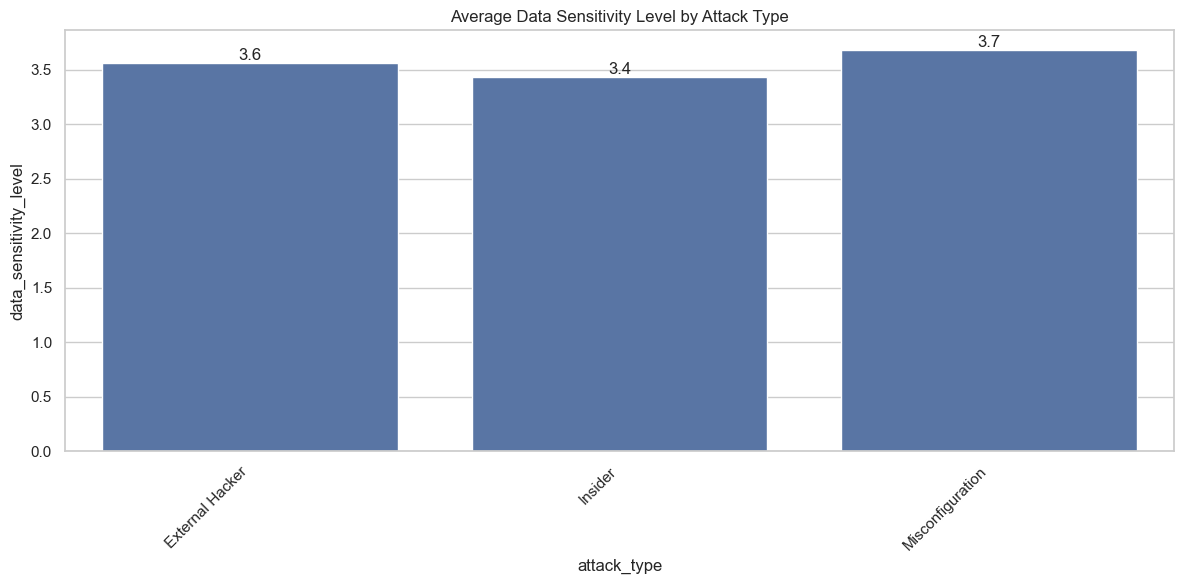

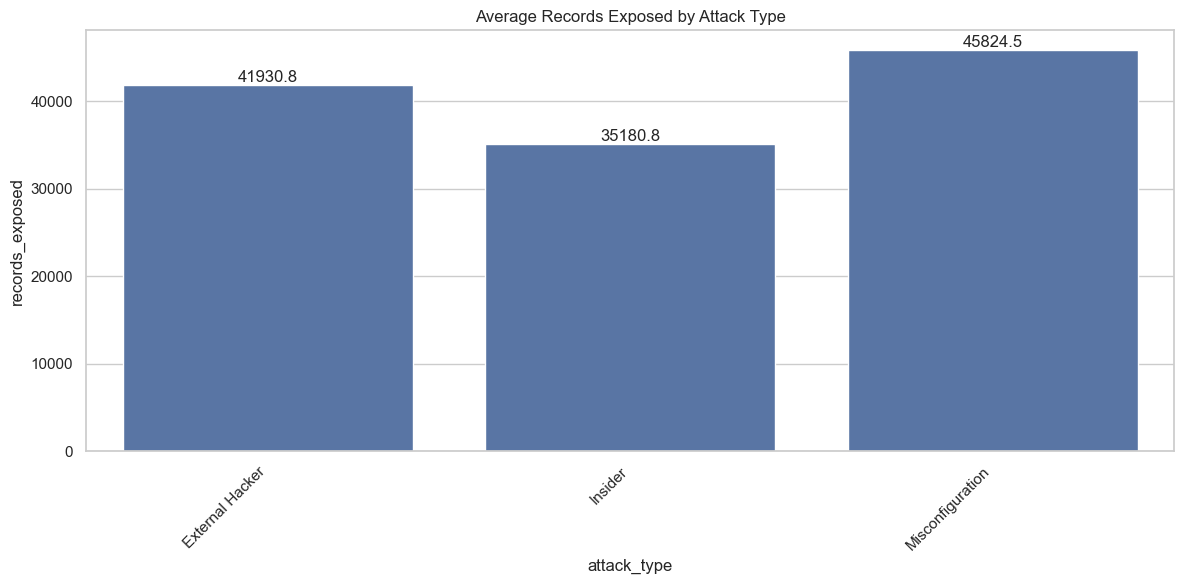

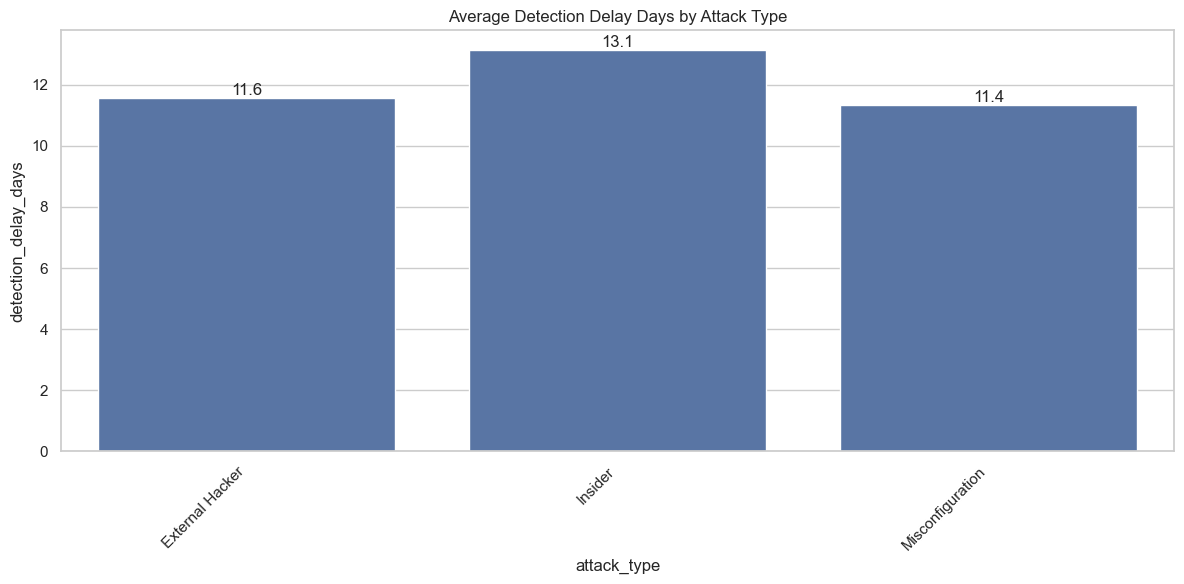

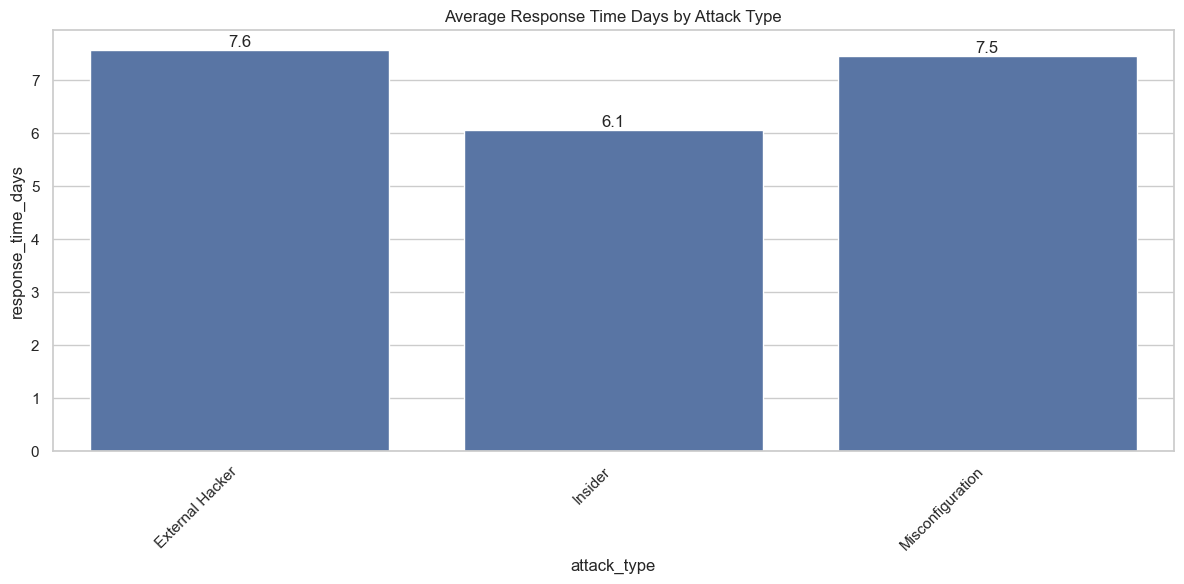

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

sns.set_style('whitegrid')

metrics = ["data_sensitivity_level", "records_exposed", "detection_delay_days", "response_time_days"]

for metric in metrics:
    grp = df.groupby("attack_type")[metric].mean().reset_index()
    
    plt.figure(figsize=(12,6))
    ax = sns.barplot(data=grp, x="attack_type", y=metric)
    
    # Label bars with values
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width()/2, p.get_height()), 
                    ha='center', va='bottom')
    
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Average {metric.replace('_', ' ').title()} by Attack Type")
    
    # Disable scientific notation for y-axis
    plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.tight_layout()
    plt.show()


Not much to see here, moving on to make visuals look nicer using themes from slides

In [142]:
theme_gradient = ["#070908", "#233d40", "#638079", "#6f8384", "#9eb49f", "#bac5bd"]


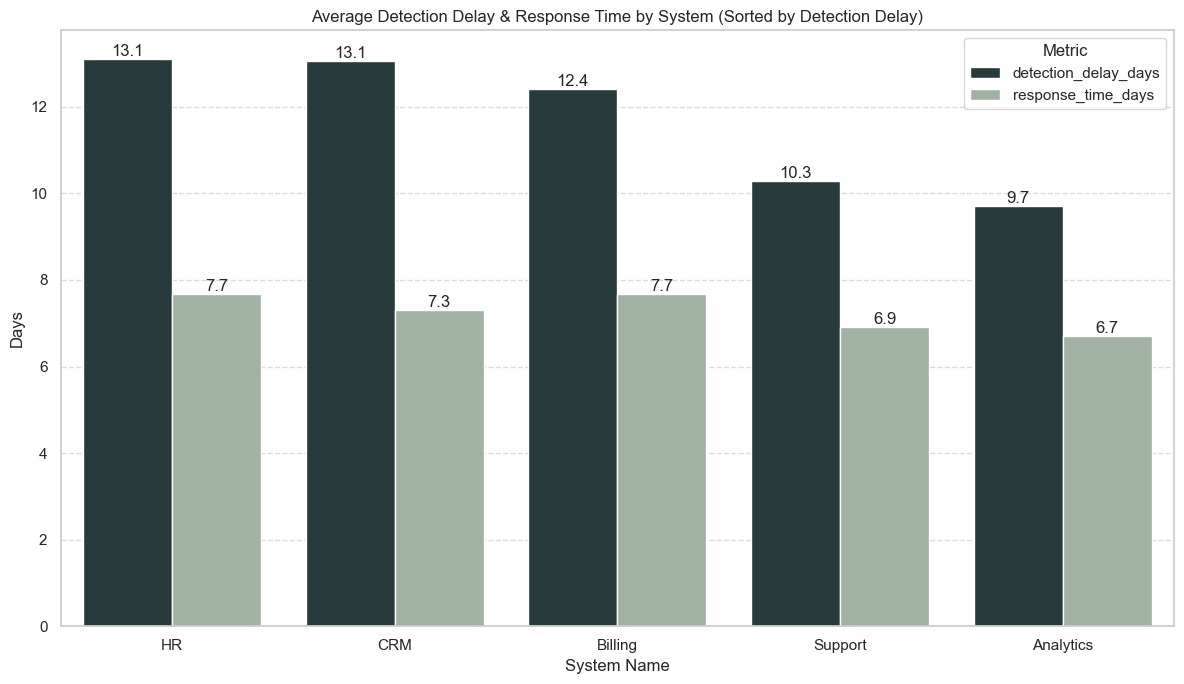

In [144]:
colors = {
    'detection_delay_days': theme_gradient[1],  # "#233d40" - dark teal
    'response_time_days': theme_gradient[4]    # "#9eb49f" - lighter green
}
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    data=melted_average_times,
    x='system_name',
    y='Days',
    hue='Metric',
    palette=colors,
    order=sorted_systems
)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.title('Average Detection Delay & Response Time by System (Sorted by Detection Delay)')
plt.xlabel('System Name')
plt.ylabel('Days')
plt.legend(title='Metric')
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


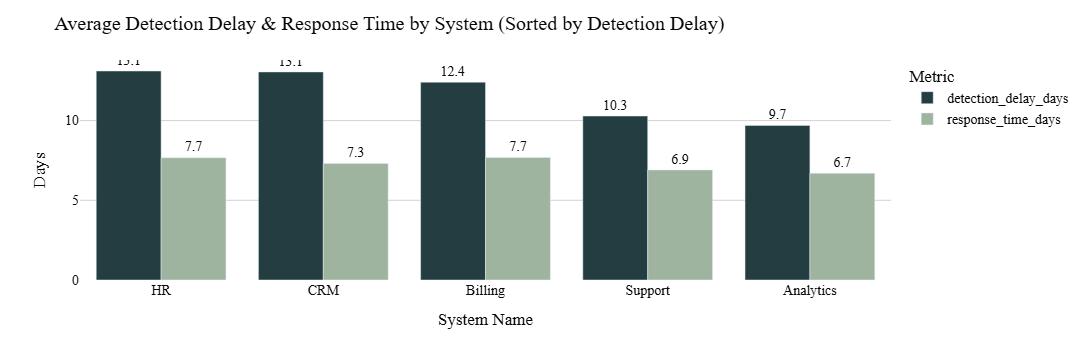

In [153]:
import plotly.express as px

# Create the figure
fig = px.bar(
    melted_average_times,
    x='system_name',
    y='Days',
    color='Metric',
    barmode='group',
    color_discrete_map=colors,
    category_orders={'system_name': sorted_systems},  # keep your sorted order
    text='Days'
)

# Update layout for modern look
fig.update_layout(
    title='Average Detection Delay & Response Time by System (Sorted by Detection Delay)',
    title_font=dict(family='Work Sans', size=20, color='#070908'),
    xaxis_title='System Name',
    yaxis_title='Days',
    font=dict(family='Work Sans', size=14, color='#070908'),
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(tickangle=0, showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey', gridwidth=1)
)

# Format the bar labels
fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')

fig.show()

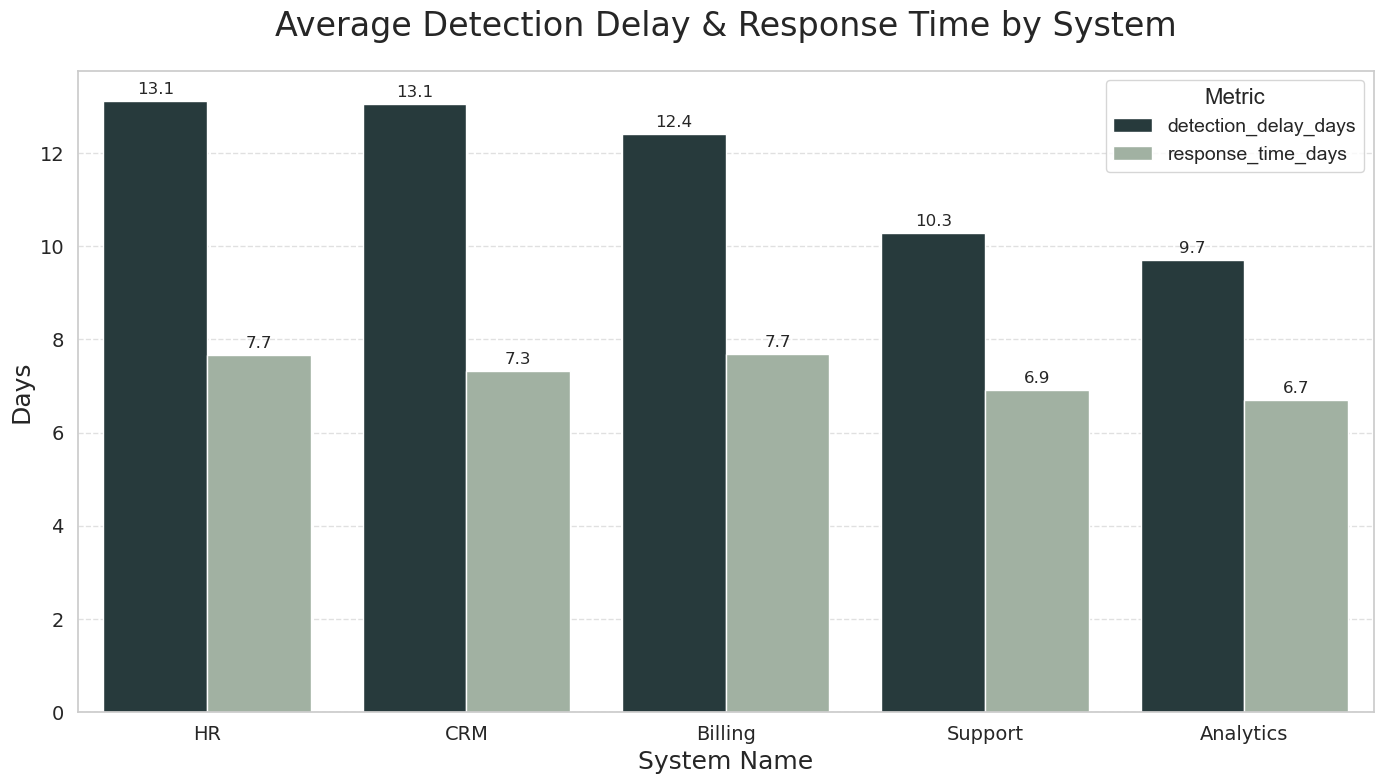

In [163]:
from matplotlib.ticker import ScalarFormatter

plt.rcParams['font.family'] = 'DejaVu Sans'  # built-in safe sans-serif

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=melted_average_times,
    x='system_name',
    y='Days',
    hue='Metric',
    palette=colors,
    order=sorted_systems
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3)

plt.title('Average Detection Delay & Response Time by System', fontsize=24, pad=25)
plt.xlabel('System Name', fontsize=18)
plt.ylabel('Days', fontsize=18)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.legend(title='Metric', title_fontsize=16, fontsize=14, loc='upper right')

plt.tight_layout()
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\264768446.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




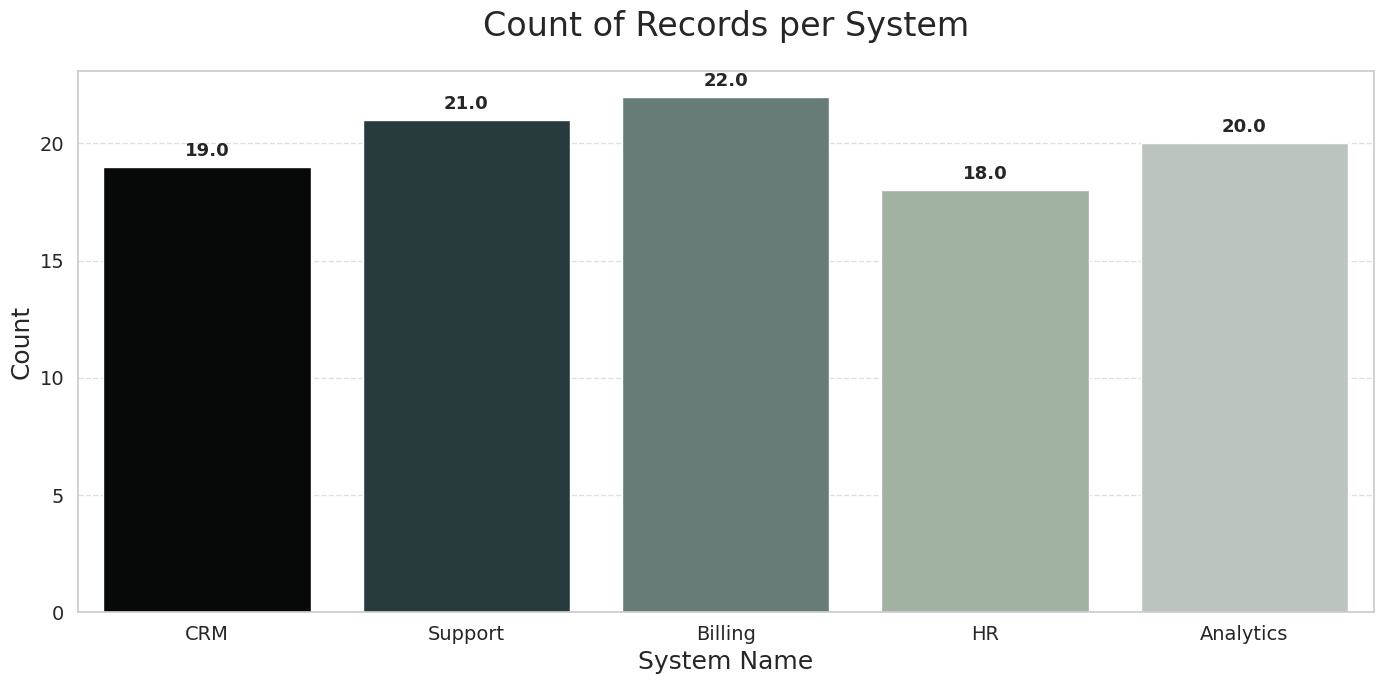

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

plt.rcParams['font.family'] = 'DejaVu Sans'

# Use your 5-color theme
bar_colors = [
    "#070908",
    "#233d40",
    "#638079",
    "#9eb49f",
    "#bac5bd"
]

plt.figure(figsize=(14, 7))
ax = sns.countplot(
    data=df,
    x="system_name",
    palette=bar_colors
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=13, weight='bold', xytext=(0, 5),
        textcoords='offset points'
    )

plt.title("Count of Records per System", fontsize=24, pad=25)
plt.xlabel("System Name", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\4275922264.py:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




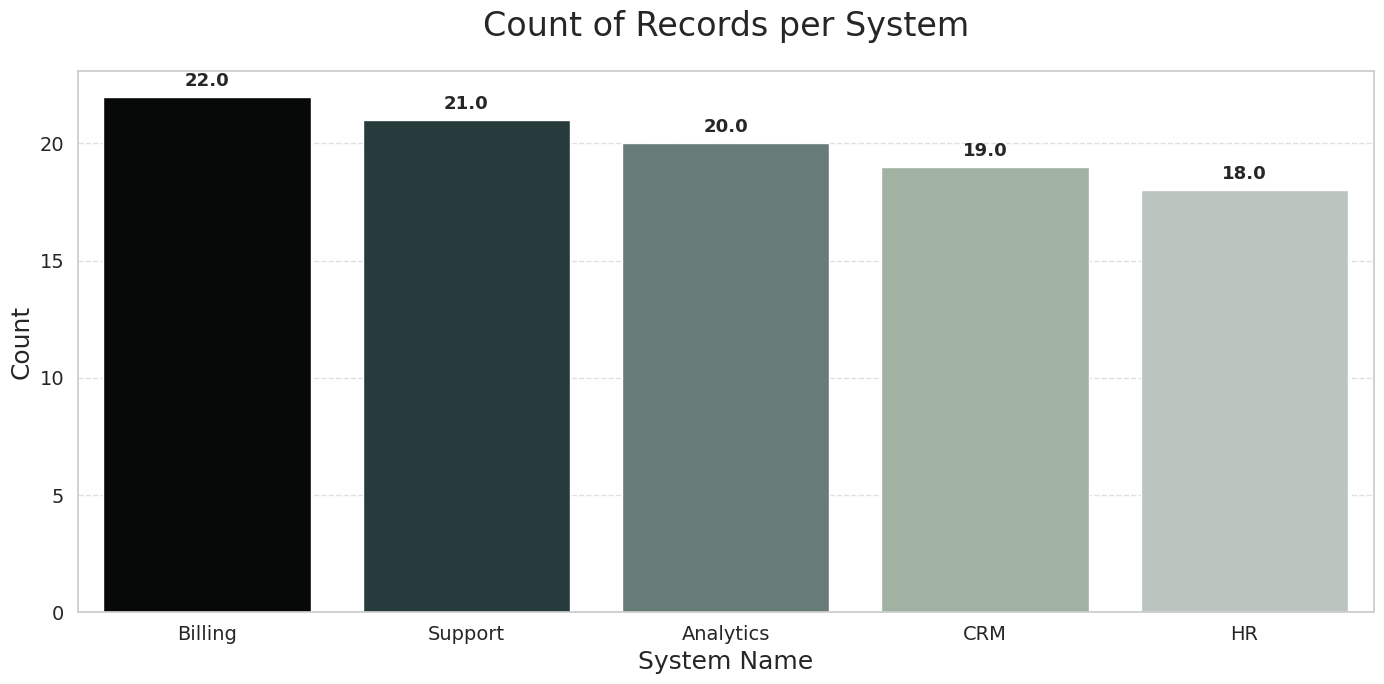

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

plt.rcParams['font.family'] = 'DejaVu Sans'

# Dark → light gradient from your theme
gradient = [
    "#070908",
    "#233d40",
    "#638079",
    "#9eb49f",
    "#bac5bd"
]

# Count systems and sort by count
counts = df["system_name"].value_counts().sort_values(ascending=False)
systems_sorted = counts.index.tolist()

# Assign darkest to highest count, lightest to lowest
color_map = {system: gradient[i] for i, system in enumerate(systems_sorted)}

plt.figure(figsize=(14, 7))
ax = sns.countplot(
    data=df,
    x="system_name",
    order=systems_sorted,
    palette=[color_map[s] for s in systems_sorted]
)

# Value labels
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=13, weight='bold', xytext=(0, 5),
        textcoords='offset points'
    )

plt.title("Count of Records per System", fontsize=24, pad=25)
plt.xlabel("System Name", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\3281606689.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




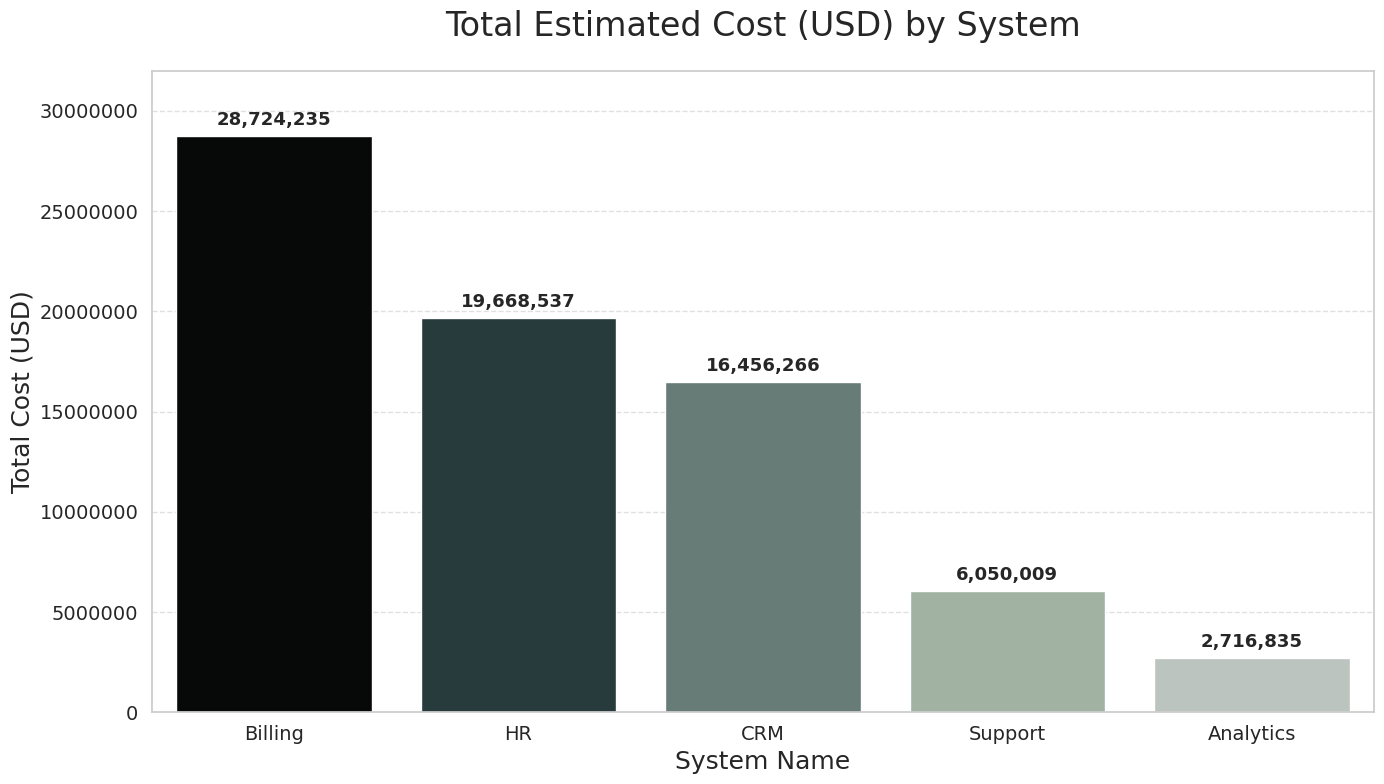

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

plt.rcParams['font.family'] = 'DejaVu Sans'

gradient = [
    "#070908",
    "#233d40",
    "#638079",
    "#9eb49f",
    "#bac5bd"
]

grp_total_cost = (
    df.groupby("system_name")["estimated_total_cost_usd"]
      .sum()
      .reset_index()
)

# Sort by cost, high → low
grp_total_cost = grp_total_cost.sort_values(by="estimated_total_cost_usd", ascending=False)

systems_sorted = grp_total_cost["system_name"].tolist()

# Assign darkest → lightest
color_map = {system: gradient[i] for i, system in enumerate(systems_sorted)}

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=grp_total_cost,
    x="system_name",
    y="estimated_total_cost_usd",
    palette=[color_map[s] for s in systems_sorted]
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=13, weight='bold', xytext=(0, 5),
        textcoords='offset points'
    )

plt.title("Total Estimated Cost (USD) by System", fontsize=24, pad=25)
plt.xlabel("System Name", fontsize=18)
plt.ylabel("Total Cost (USD)", fontsize=18)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14)

plt.ylim(0, 32000000)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.savefig("total_cost_system.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\1850383027.py:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




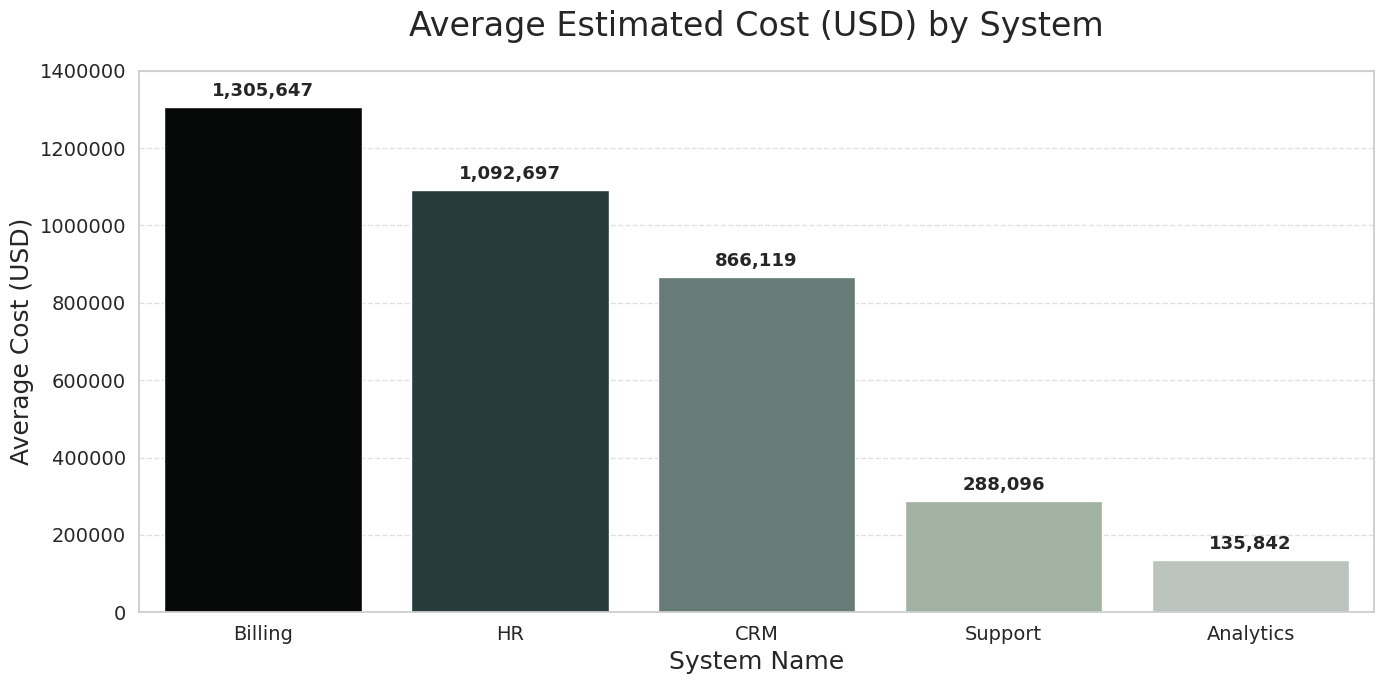

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

plt.rcParams['font.family'] = 'DejaVu Sans'

# Dark → light gradient
gradient = [
    "#070908",
    "#233d40",
    "#638079",
    "#9eb49f",
    "#bac5bd"
]

grp_avg_cost = (
    df.groupby("system_name")["estimated_total_cost_usd"]
      .mean()
      .reset_index()
)

# Sort by average cost, high → low
grp_avg_cost = grp_avg_cost.sort_values(by="estimated_total_cost_usd", ascending=False)
systems_sorted = grp_avg_cost["system_name"].tolist()

# Assign darkest → lightest
color_map = {system: gradient[i] for i, system in enumerate(systems_sorted)}

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=grp_avg_cost,
    x="system_name",
    y="estimated_total_cost_usd",
    palette=[color_map[s] for s in systems_sorted]
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', fontsize=13, weight='bold',
        xytext=(0, 5), textcoords='offset points'
    )

plt.title("Average Estimated Cost (USD) by System", fontsize=24, pad=25)
plt.xlabel("System Name", fontsize=18)
plt.ylabel("Average Cost (USD)", fontsize=18)
plt.xticks(rotation=0, ha='center', fontsize=14)
plt.yticks(fontsize=14)


plt.ylim(0, 1400000)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.savefig("avg_cost_system.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\174920152.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




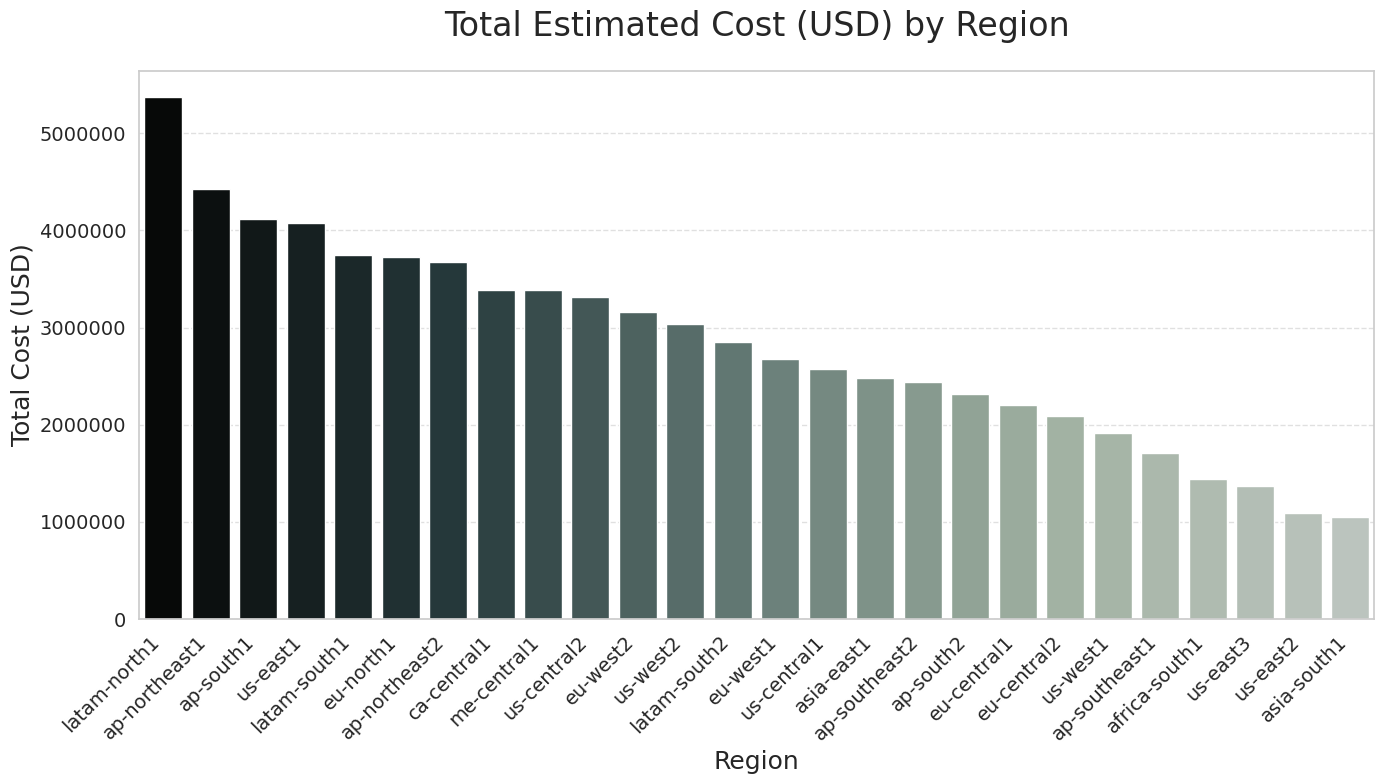

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as mcolors
import numpy as np

plt.rcParams['font.family'] = 'DejaVu Sans'

gradient = [
    "#070908",
    "#233d40",
    "#638079",
    "#9eb49f",
    "#bac5bd"
]

grp_total_cost = (
    df.groupby("region")["estimated_total_cost_usd"]
      .sum()
      .reset_index()
)

grp_total_cost = grp_total_cost.sort_values(
    by="estimated_total_cost_usd", ascending=False
)

regions_sorted = grp_total_cost["region"].tolist()
values = grp_total_cost["estimated_total_cost_usd"].tolist()

cmap = mcolors.LinearSegmentedColormap.from_list("smooth_grad", gradient)

N = len(regions_sorted)
colors = [cmap(i / (N - 1)) for i in range(N)]

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=grp_total_cost,
    x="region",
    y="estimated_total_cost_usd",
    palette=colors
)

# Dynamic offset to prevent overlapping labels
for p in ax.patches:
    height = p.get_height()
    offset = height * 0.015  # 1.5% vertical offset
    '''
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2, height + offset),
        ha='center',
        va='bottom',
        fontsize=8,
        weight='bold'
    )
    '''

plt.title("Total Estimated Cost (USD) by Region", fontsize=24, pad=25)
plt.xlabel("Region", fontsize=18)
plt.ylabel("Total Cost (USD)", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.savefig("total_cost_region.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


In [215]:
df.head()

,system_name,region,attack_type,data_sensitivity_level,records_exposed,estimated_cost_per_record_usd,estimated_total_cost_usd,detection_delay_days,response_time_days,notification_required,region_category
0,CRM,latam-south2,External Hacker,4,56681,17.91,1014973.29,18,7,Yes,South America
1,CRM,ca-central1,Misconfiguration,4,97901,18.07,1769502.68,10,9,Yes,Canada
2,Support,africa-south1,Misconfiguration,3,16274,13.34,217074.77,3,3,Yes,Africa
3,Billing,asia-south1,Insider,5,41640,21.44,892759.36,9,4,Yes,Asia
4,HR,eu-north1,Misconfiguration,5,45484,21.09,959464.03,7,7,Yes,Europe


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\714239679.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




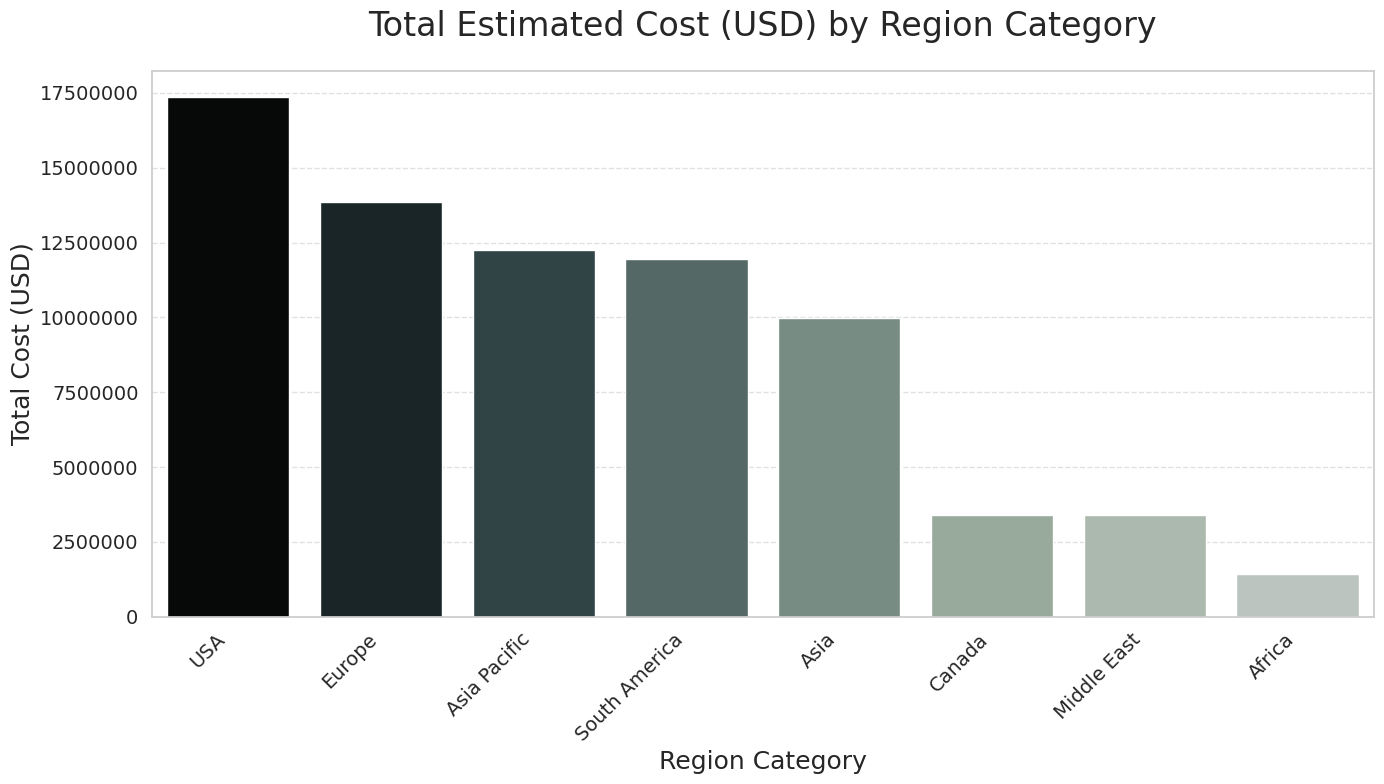

In [238]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as mcolors
import numpy as np

plt.rcParams['font.family'] = 'DejaVu Sans'

gradient = [
    "#070908",
    "#233d40",
    "#638079",
    "#9eb49f",
    "#bac5bd"
]

grp_total_cost = (
    df.groupby("region_category")["estimated_total_cost_usd"]
      .sum()
      .reset_index()
)

grp_total_cost = grp_total_cost.sort_values(
    by="estimated_total_cost_usd", ascending=False
)

regions_sorted = grp_total_cost["region_category"].tolist()
values = grp_total_cost["estimated_total_cost_usd"].tolist()

cmap = mcolors.LinearSegmentedColormap.from_list("smooth_grad", gradient)

N = len(regions_sorted)
colors = [cmap(i / (N - 1)) for i in range(N)]

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=grp_total_cost,
    x="region_category",
    y="estimated_total_cost_usd",
    palette=colors
)

# Dynamic offset to prevent overlapping labels
for p in ax.patches:
    height = p.get_height()
    offset = height * 0.015  # 1.5% vertical offset
    '''
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2, height + offset),
        ha='center',
        va='bottom',
        fontsize=8,
        weight='bold'
    )
    '''

plt.title("Total Estimated Cost (USD) by Region Category", fontsize=24, pad=25)
plt.xlabel("Region Category", fontsize=18)
plt.ylabel("Total Cost (USD)", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.savefig("total_cost_regioncat.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\2585757106.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




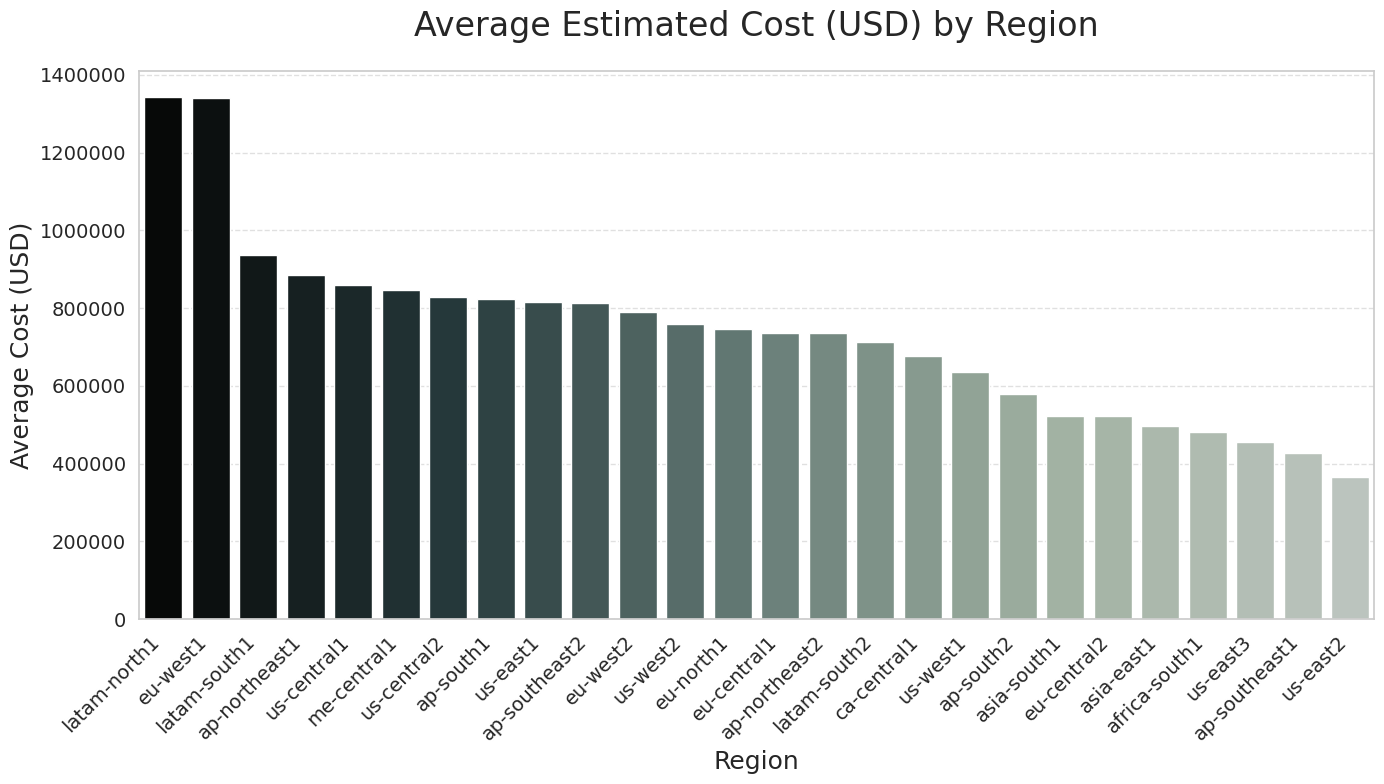

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as mcolors
import numpy as np

plt.rcParams['font.family'] = 'DejaVu Sans'

gradient = [
    "#070908",
    "#233d40",
    "#638079",
    "#9eb49f",
    "#bac5bd"
]

grp_total_cost = (
    df.groupby("region")["estimated_total_cost_usd"]
      .mean()
      .reset_index()
)

grp_total_cost = grp_total_cost.sort_values(
    by="estimated_total_cost_usd", ascending=False
)

regions_sorted = grp_total_cost["region"].tolist()
values = grp_total_cost["estimated_total_cost_usd"].tolist()

cmap = mcolors.LinearSegmentedColormap.from_list("smooth_grad", gradient)

N = len(regions_sorted)
colors = [cmap(i / (N - 1)) for i in range(N)]

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=grp_total_cost,
    x="region",
    y="estimated_total_cost_usd",
    palette=colors
)

# Dynamic offset to prevent overlapping labels
for p in ax.patches:
    height = p.get_height()
    offset = height * 0.015  # 1.5% vertical offset
    '''
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2, height + offset),
        ha='center',
        va='bottom',
        fontsize=8,
        weight='bold'
    )
    '''

plt.title("Average Estimated Cost (USD) by Region", fontsize=24, pad=25)
plt.xlabel("Region", fontsize=18)
plt.ylabel("Average Cost (USD)", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.savefig("avg_cost_region.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\1185669914.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




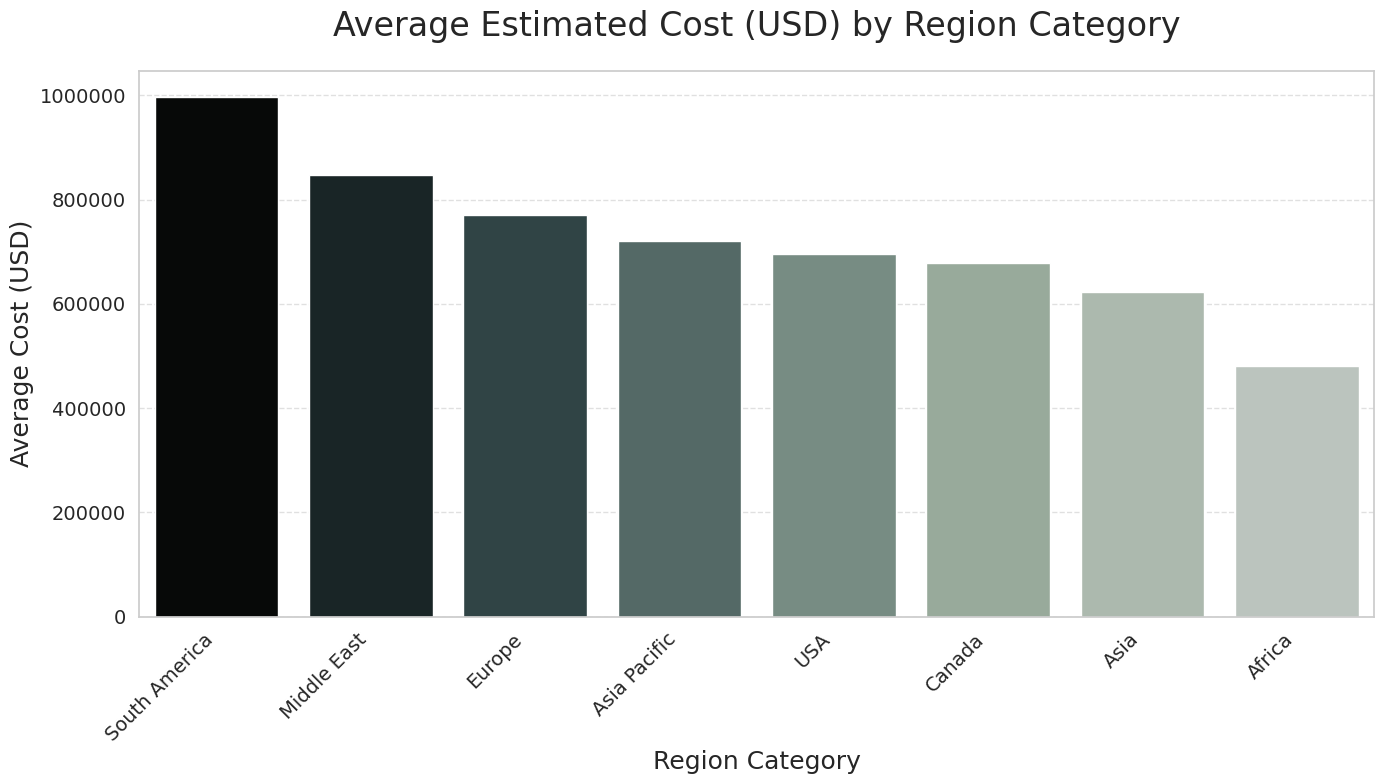

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as mcolors
import numpy as np

plt.rcParams['font.family'] = 'DejaVu Sans'

gradient = [
    "#070908",
    "#233d40",
    "#638079",
    "#9eb49f",
    "#bac5bd"
]

grp_total_cost = (
    df.groupby("region_category")["estimated_total_cost_usd"]
      .mean()
      .reset_index()
)

grp_total_cost = grp_total_cost.sort_values(
    by="estimated_total_cost_usd", ascending=False
)

regions_sorted = grp_total_cost["region_category"].tolist()
values = grp_total_cost["estimated_total_cost_usd"].tolist()

cmap = mcolors.LinearSegmentedColormap.from_list("smooth_grad", gradient)

N = len(regions_sorted)
colors = [cmap(i / (N - 1)) for i in range(N)]

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=grp_total_cost,
    x="region_category",
    y="estimated_total_cost_usd",
    palette=colors
)

# Dynamic offset to prevent overlapping labels
for p in ax.patches:
    height = p.get_height()
    offset = height * 0.015  # 1.5% vertical offset
    '''
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2, height + offset),
        ha='center',
        va='bottom',
        fontsize=8,
        weight='bold'
    )
    '''

plt.title("Average Estimated Cost (USD) by Region Category", fontsize=24, pad=25)
plt.xlabel("Region Category", fontsize=18)
plt.ylabel("Average Cost (USD)", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.savefig("avg_cost_regioncat.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\2685282703.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




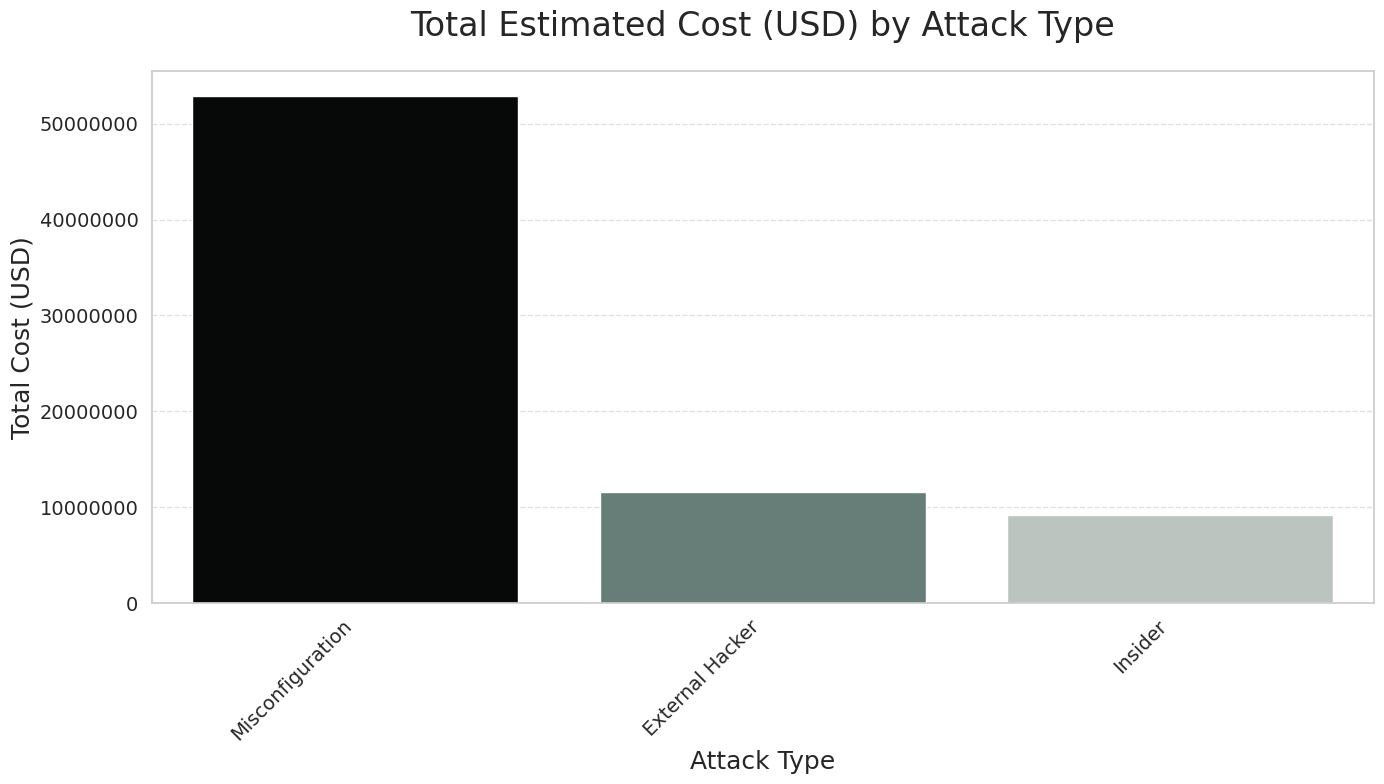

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as mcolors
import numpy as np

plt.rcParams['font.family'] = 'DejaVu Sans'

gradient = [
    "#070908",
    "#233d40",
    "#638079",
    "#9eb49f",
    "#bac5bd"
]

# --- GROUP BY attack_type (TOTAL) ---
grp_total_cost = (
    df.groupby("attack_type")["estimated_total_cost_usd"]
      .sum()
      .reset_index()
)

grp_total_cost = grp_total_cost.sort_values(
    by="estimated_total_cost_usd", ascending=False
)

attack_sorted = grp_total_cost["attack_type"].tolist()
values = grp_total_cost["estimated_total_cost_usd"].tolist()

cmap = mcolors.LinearSegmentedColormap.from_list("smooth_grad", gradient)
N = len(attack_sorted)
colors = [cmap(i / (N - 1)) for i in range(N)]

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=grp_total_cost,
    x="attack_type",
    y="estimated_total_cost_usd",
    palette=colors
)

plt.title("Total Estimated Cost (USD) by Attack Type", fontsize=24, pad=25)
plt.xlabel("Attack Type", fontsize=18)
plt.ylabel("Total Cost (USD)", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.savefig("total_cost_attack_type.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


C:\Users\benja\AppData\Local\Temp\ipykernel_61252\2811975729.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




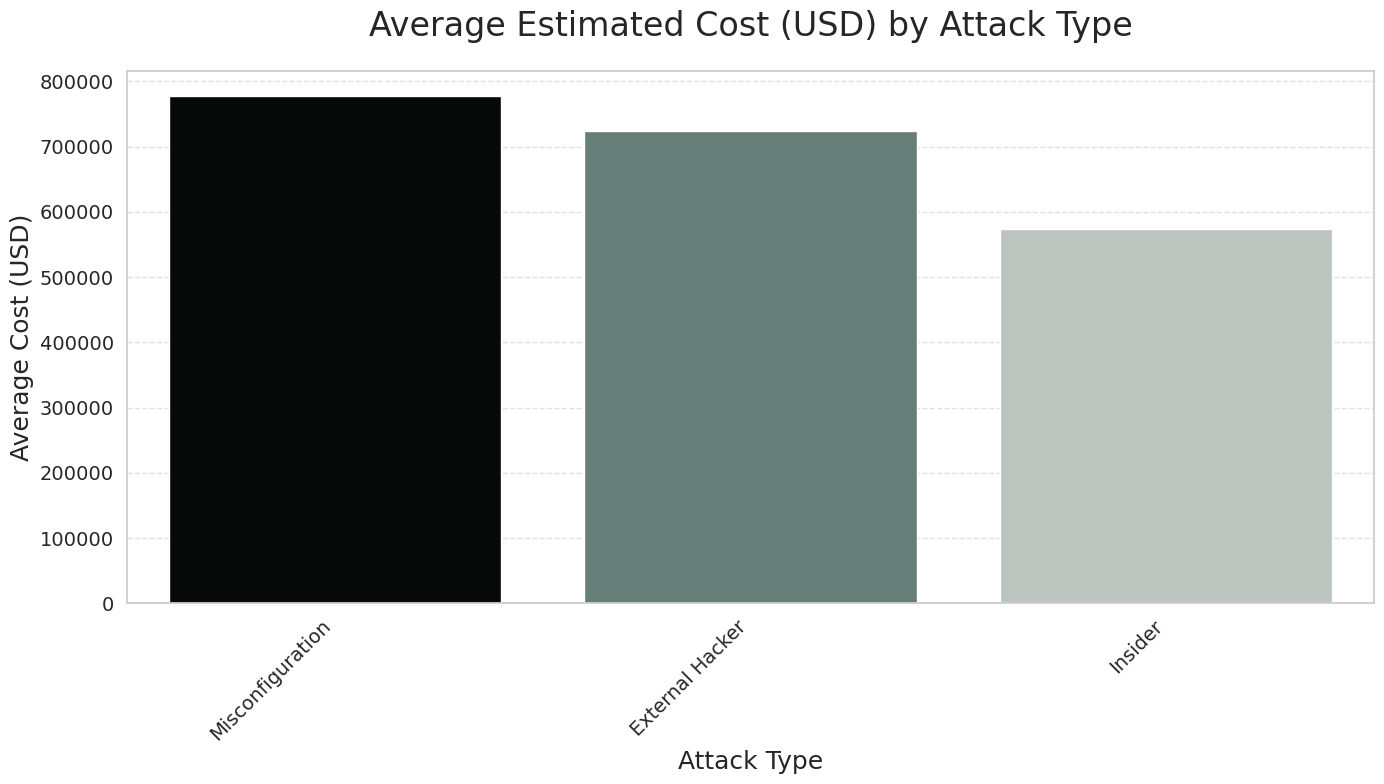

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as mcolors
import numpy as np

plt.rcParams['font.family'] = 'DejaVu Sans'

gradient = [
    "#070908",
    "#233d40",
    "#638079",
    "#9eb49f",
    "#bac5bd"
]

# --- GROUP BY attack_type (AVERAGE) ---
grp_avg_cost = (
    df.groupby("attack_type")["estimated_total_cost_usd"]
      .mean()
      .reset_index()
)

grp_avg_cost = grp_avg_cost.sort_values(
    by="estimated_total_cost_usd", ascending=False
)

attack_sorted = grp_avg_cost["attack_type"].tolist()
values = grp_avg_cost["estimated_total_cost_usd"].tolist()

cmap = mcolors.LinearSegmentedColormap.from_list("smooth_grad", gradient)
N = len(attack_sorted)
colors = [cmap(i / (N - 1)) for i in range(N)]

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=grp_avg_cost,
    x="attack_type",
    y="estimated_total_cost_usd",
    palette=colors
)

plt.title("Average Estimated Cost (USD) by Attack Type", fontsize=24, pad=25)
plt.xlabel("Attack Type", fontsize=18)
plt.ylabel("Average Cost (USD)", fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

sns.set_style('whitegrid')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')

plt.savefig("average_cost_attack_type.png", dpi=300, bbox_inches="tight")

plt.tight_layout()
plt.show()


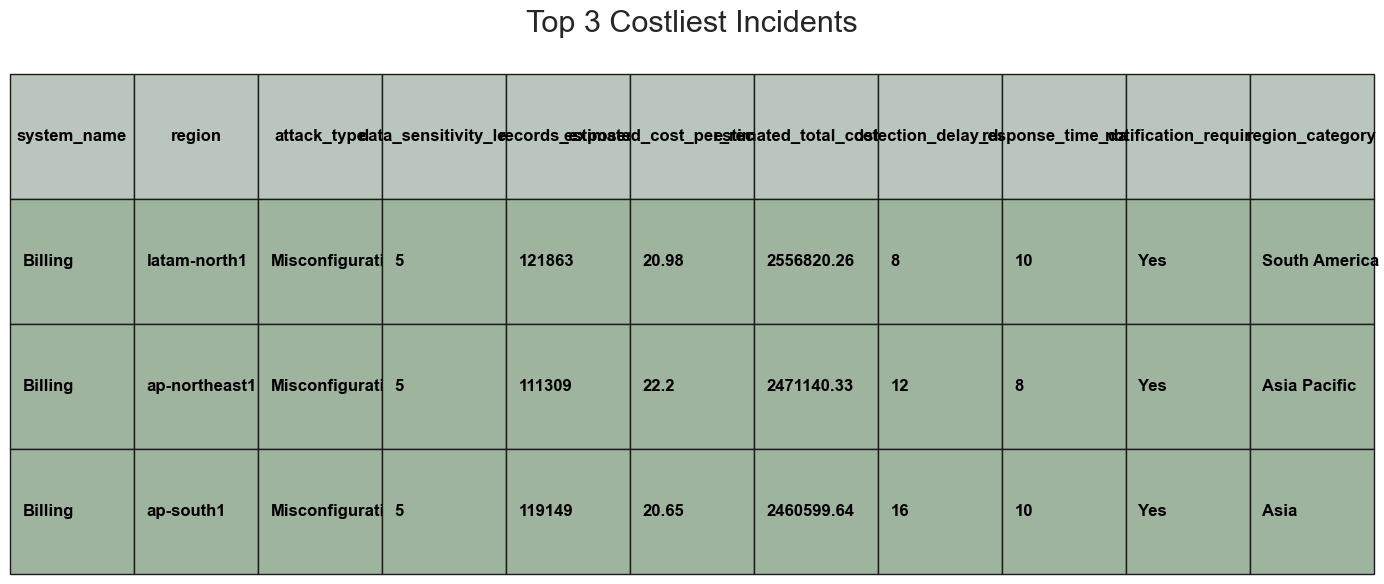

In [280]:
import matplotlib.pyplot as plt
import seaborn as sns

# Light colors from your palette
header_color = "#bac5bd"  # lightest for headers
row_color = "#9eb49f"     # slightly darker for data rows

# Get top 3 incidents
top_3 = df.sort_values(
    by="estimated_total_cost_usd",
    ascending=False
).head(3)

fig, ax = plt.subplots(figsize=(14, 6))
ax.axis("off")

tbl = plt.table(
    cellText=top_3.values,
    colLabels=top_3.columns,
    loc="center",
    cellLoc="left",
    bbox=[0, 0, 1, 1]
)

# Font
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)

# Scale table (longer cells across)
tbl.scale(2.5, 3.0)  # increase width, keep height same

# Apply color
for row_idx in range(1, len(top_3) + 1):  # data rows
    for col_idx in range(len(top_3.columns)):
        tbl[(row_idx, col_idx)].set_facecolor(row_color)
        tbl[(row_idx, col_idx)].set_text_props(color="black", weight="bold")

# Header row
for col_idx in range(len(top_3.columns)):
    tbl[(0, col_idx)].set_facecolor(header_color)
    tbl[(0, col_idx)].set_text_props(color="black", weight="bold")

plt.title("Top 3 Costliest Incidents", fontsize=22, pad=30)
plt.tight_layout()
plt.show()


In [282]:
df.columns

Index(['system_name', 'region', 'attack_type', 'data_sensitivity_level',
       'records_exposed', 'estimated_cost_per_record_usd',
       'estimated_total_cost_usd', 'detection_delay_days',
       'response_time_days', 'notification_required', 'region_category'],
      dtype='object')

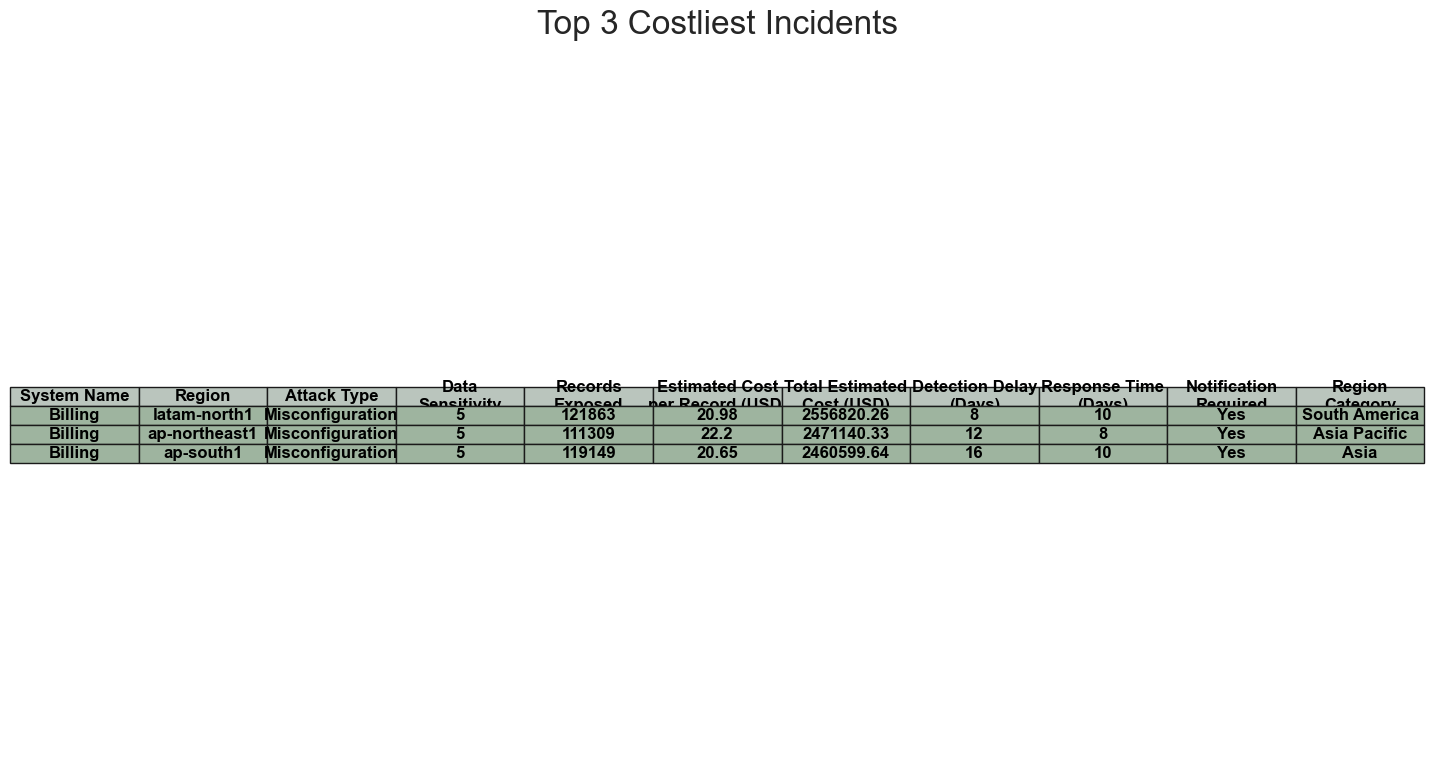

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns

header_color = "#bac5bd"
row_color = "#9eb49f"

top_3 = df.sort_values(
    by="estimated_total_cost_usd",
    ascending=False
).head(3)

custom_columns = [
    "System Name",
    "Region",
    "Attack Type",
    "Data\nSensitivity",
    "Records\nExposed",
    "Estimated Cost\nper Record (USD)",
    "Total Estimated\nCost (USD)",
    "Detection Delay\n(Days)",
    "Response Time\n(Days)",
    "Notification\nRequired",
    "Region\nCategory"
]

fig, ax = plt.subplots(figsize=(18, 8))
ax.axis("off")

tbl = plt.table(
    cellText=top_3.values,
    colLabels=custom_columns,
    loc="center",
    cellLoc="center",
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(12)

# Widen every cell
for row in range(len(top_3)+1):  # +1 for header
    for col in range(len(custom_columns)):
        tbl[(row, col)].set_width(0.15)  # increase this number to make cells wider

# Apply colors
for row_idx in range(1, len(top_3)+1):
    for col_idx in range(len(custom_columns)):
        tbl[(row_idx, col_idx)].set_facecolor(row_color)
        tbl[(row_idx, col_idx)].set_text_props(color="black", weight="bold")

for col_idx in range(len(custom_columns)):
    tbl[(0, col_idx)].set_facecolor(header_color)
    tbl[(0, col_idx)].set_text_props(color="black", weight="bold")

plt.title("Top 3 Costliest Incidents", fontsize=24, pad=30)
plt.tight_layout()
plt.show()
